In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import random

#pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams.update({'figure.max_open_warning': 0})

C:\Users\theoj\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def sportMap(x):
    if 'Athlétisme' in x:
        x='Athlétisme'
    elif 'Hockey' in x:
        x='Hockey'
    elif 'hiver' in x:
        x='Hiver'
    elif 'combat' in x:
        x='Combat'
    elif 'raquettes' in x:
        x='Raquettes'
    elif 'équestres' in x:
        x='Equestres'
    else:
        return x
    return x

def metierMap(x):
    if 'militaire' in x.lower():
        x="Militaire"
    elif 'cadre' in x.lower():
        x="Cadre"
    elif 'foyer' in x.lower():
        x="Parent au foyer"
    elif 'travail' in x.lower():
        x="Demandeur d'emploi"
    else:
        return x
    return x
def activitéMap(x):
    if 'armée' in x.lower():
        x="Défense et Sécurité"
    elif 'avocat' in x.lower():
        x="Droit"
    elif 'f&b' in x.lower():
        x="Agroalimentaire"
    elif any(c in x.lower() for c in ('business','accounting')) :
        x="Finance"
    elif 'logistique' in x.lower():
        x="Commerce / Distribution"
    elif 'humaines' in x.lower():
        x="Ressources humaines"
    elif 'physique' in x.lower():
        x="Physique / Mécanique"
    elif 'travail' in x.lower():
        x="Chomage"
    elif 'lecture' in x.lower():
        x="Edition"
    elif any(c in x.lower() for c in ('école','lycée')):
        x="Education"
    else:
        return x
    return x
def secteurMap(x):
    if 'seine' in x.lower():
        x="Île-de-France"
    elif 'liban' in x.lower():
        x="Liban"
    elif 'beyrouth' in x.lower():
        x="Liban"
    else:
        return x
    return x

def raisonsMap(dicti):
    returnDict = {}
    for x in dicti.keys():
        if 'pas utile à mon niveau de pratique du sport' in x.lower().strip():
            raison="Pas utile à mon niveau de pratique du sport"
        elif "pas nécessaire" in x.lower().strip():
            raison="Pas utile à mon niveau de pratique du sport"
        elif "je trouve difficile de choisir un appareil parmi beaucoup de choix disponibles" in x.lower().strip():
            raison="Je trouve difficile de choisir un appareil parmi beaucoup de choix disponibles"
        elif "pas de connaissance sur l'existence d'un appareil utile pour mon sport" in x.lower().strip():
            raison="Pas de connaissance sur l'existence d'un appareil utile pour mon sport"
        elif "mon club sportif ne possède pas ce type d'appareil" in x.lower().strip():
            raison="Mon club sportif ne possède pas ce type d'appareil"
        elif "connaissance d'un appareil utile mais trop cher" in x.lower().strip():
            raison="Connaissance d'un appareil utile mais trop cher"
        else:
            raison=x

        if(raison not in returnDict.keys()):
            returnDict[raison] = dicti[x]
        else:
            returnDict[raison]+= dicti[x]

    return returnDict

def raisonsOuiMap(dicti):
    returnDict = {}
    for x in dicti.keys():
        if 'pouvoir suivre mes performances' in x.lower().strip():
            raison="Pouvoir suivre mes performances"
        elif "pouvoir améliorer mes performances" in x.lower().strip():
            raison="Pouvoir améliorer mes performances"
        elif "me motiver à pratiquer plus régulièrement mon sport" in x.lower().strip():
            raison="Me motiver à pratiquer plus régulièrement mon sport"
        elif "pouvoir comparer mes performances avec celles d'autres sportifs (mes amis et des pro)" in x.lower().strip():
            raison="Pouvoir comparer mes performances avec celles d'autres sportifs (mes amis et des pro)"
        elif "sur conseils de mon médecin pour une rééducation ou suivi médical" in x.lower().strip():
            raison="Sur conseils de mon médecin pour une rééducation ou suivi médical"
        elif "pouvoir pratiquer mon sport en réduisant les blessures" in x.lower().strip():
            raison="Pouvoir pratiquer mon sport en réduisant les blessures"
        elif "innovation technologique utilisée par les plus grands sportifs" in x.lower().strip():
            raison="Être en possession d'une innovation technologique utilisée par les plus grands sportifs"
        else:
            raison=x

        if(raison not in returnDict.keys()):
            returnDict[raison] = dicti[x]
        else:
            returnDict[raison]+= dicti[x]

    return returnDict

def influenceMap(dfAll):
    indexes = dfAll.index
    dicti = {}
    for ind in indexes:
        dicti[ind] = dfAll["count"].loc[ind]
    returnDict = {}
    for x in dicti.keys():
        if any(c in x.lower() for c in ('suivi','suivre')):
            raison="Pouvoir suivre mes performances"
        elif "pouvoir améliorer mes performances" in x.lower().strip():
            raison="Pouvoir améliorer mes performances"
        else:
            raison=x

        if(raison not in returnDict.keys()):
            returnDict[raison] = dicti[x]
        else:
            returnDict[raison]+= dicti[x]

    return returnDict

In [3]:
url="https://docs.google.com/spreadsheets/d/16cXP4m1XDYwKcRIeeElBl6HpkMul82d4VYYz6XiTwOg/export?format=csv&gid=1905028942"
dfAll = pd.read_csv(url,sep=',')
dfAll.drop(columns=['Horodateur'],inplace=True)
dfAll.dropna(axis=0,inplace=True,how='all')

column_to_move = dfAll.pop("Qui serait votre principale influence à l'utilisation d'un appareil de suivi des performances ?")
dfAll.insert(6, "Qui serait votre principale influence à l'utilisation d'un appareil de suivi des performances ?", column_to_move)
column_to_move = dfAll.pop("Préfèreriez-vous avoir votre propre appareil, ou bien utiliser un appareil présent directement à l'endroit où vous pratiquer votre sport ?")
dfAll.insert(7, "Préfèreriez-vous avoir votre propre appareil, ou bien utiliser un appareil présent directement à l'endroit où vous pratiquer votre sport ?", column_to_move)
column_to_move = dfAll.pop("Est-ce que l'achat d'un appareil reconditionné / d'occasion, et donc moins cher, vous intéresserait ?")
dfAll.insert(8, "Est-ce que l'achat d'un appareil reconditionné / d'occasion, et donc moins cher, vous intéresserait ?", column_to_move)

dfAll["Quel est votre sport principal dans la liste ci-dessous ?"] = dfAll["Quel est votre sport principal dans la liste ci-dessous ?"].map(sportMap)
dfAll["Quelle est votre catégorie socio-professionnelle ?"]=dfAll["Quelle est votre catégorie socio-professionnelle ?"].map(metierMap)
dfAll["Quel est votre secteur d'activité ?"]=dfAll["Quel est votre secteur d'activité ?"].map(activitéMap)
dfAll["Quelle est votre principale région de résidence ?"]=dfAll["Quelle est votre principale région de résidence ?"].map(secteurMap)
dfAll['count']=0
dfAll

À quelle fréquence pratiquez-vous une activité sportive ?  \
0                         Régulièrement chaque semaine          
1                         Régulièrement chaque semaine          
2                            Régulièrement chaque mois          
3                         Régulièrement chaque semaine          
4                         Régulièrement chaque semaine          
..                                                 ...          
124                          Régulièrement chaque mois          
125                       Régulièrement chaque semaine          
126                       Régulièrement chaque semaine          
127                       Régulièrement chaque semaine          
128                                    Plutôt rarement          

    Pratiquez-vous un sport en club sportif ? (salle de sport, club de football, cours de boxe, etc)  \
0                                                  Oui                                                 
1                                                  Oui                                                 
2                                                  Oui                                                 
3                                                  Non                                                 
4                                                  Oui                                                 
..                                                 ...                                                 
124                                                Non                                                 
125                                                Oui                                                 
126                                                Non                                                 
127                                                Oui                                                 
128                                                Oui                                                 

    Pratiquez-vous un sport en compétition ? (tournois sportifs, marathon, championnats, etc)  \
0                                                  Oui                                          
1                                                  Non                                          
2                                                  Oui                                          
3                                                  Non                                          
4                                                  Non                                          
..                                                 ...                                          
124                                                Non                                          
125                                                Oui                                          
126                                                Non                                          
127                                                Non                                          
128                                                Non                                          

    Lors de la pratique de votre sport, utilisez-vous un appareil de suivi de vos performances ? (montre connectée, capteur sur soi, application mobile, etc)  \
0                                                  Non                                                                                                          
1                                                  Non                                                                                                          
2                                                  Non                                                                                                          
3                                                  Non                                                                                                          
4   

In [4]:
print(f"Il y eu {len(dfAll)} réponses au questionnaire")

Il y eu 129 réponses au questionnaire


### Analyses selon les profils

In [5]:
def countMultiple(dfCol):
    tempDict = {}
    for i in range (len(dfCol)):
        try:
            allCol = dfCol[i].split(',')
            for val in allCol:
                if(val.strip() in tempDict.keys()):
                    tempDict[val.strip()] += 1
                else:
                    tempDict[val.strip()] = 1
        except:
            pass
    return tempDict

def getParVal(dictTec):
    tempDict = {}
    for i in dictTec.keys():
        try:
            resultat = re.findall(r"(?<=de type\s).*", i)[0][:-1]
            if(resultat in tempDict.keys()):
                tempDict[resultat] += dictTec[i]
            else:
                tempDict[resultat] = dictTec[i]
        except:
            resultat = ""
            
    return tempDict

def getColInd(dfCol,mot):
    ind = " "
    for i in dfCol.columns:
        if(mot in i):
            ind=i
            break
    return ind

<AxesSubplot:title={'center':'Genre des participants'}, ylabel='Genre'>

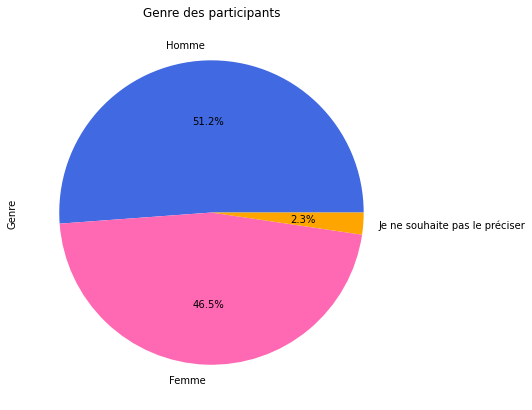

In [6]:
figWeight,figHeight = 10,7 
tempDf=dfAll.groupby(getColInd(dfAll,'genre')).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(kind='pie',figsize=(figWeight,figHeight),title="Genre des participants",ylabel='Genre',autopct='%1.1f%%',colors= ['royalblue','hotpink','orange'])

<AxesSubplot:title={'center':'Age des participants'}, ylabel='Age'>

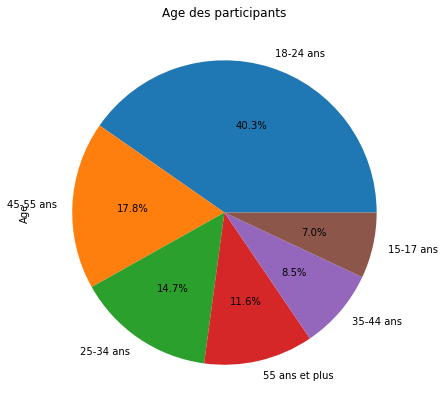

In [7]:
tempDf=dfAll.groupby(getColInd(dfAll,"tranche d'âge")).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(kind='pie',figsize=(figWeight,figHeight),title="Age des participants",ylabel='Age',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Metier des participants'}, ylabel='Metier'>

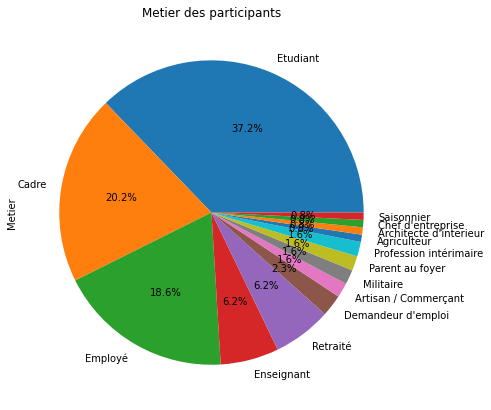

In [8]:
tempDf=dfAll.groupby(getColInd(dfAll,'socio-professionnelle')).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(kind='pie',figsize=(figWeight,figHeight),title="Metier des participants",ylabel='Metier',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Secteur des participants'}, ylabel='Secteur'>

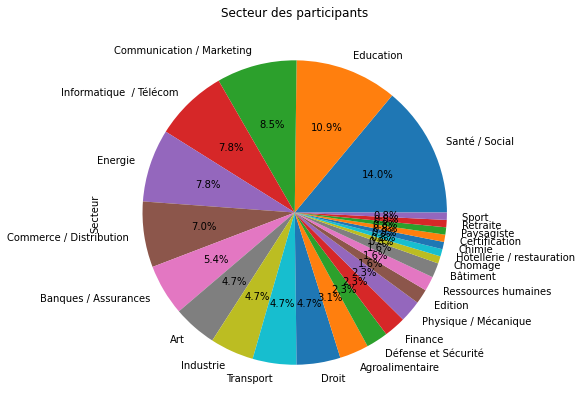

In [9]:
tempDf=dfAll.groupby(getColInd(dfAll,'secteur')).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(kind='pie',figsize=(figWeight,figHeight),title="Secteur des participants",ylabel='Secteur',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Lieu des participants'}, ylabel='Lieu'>

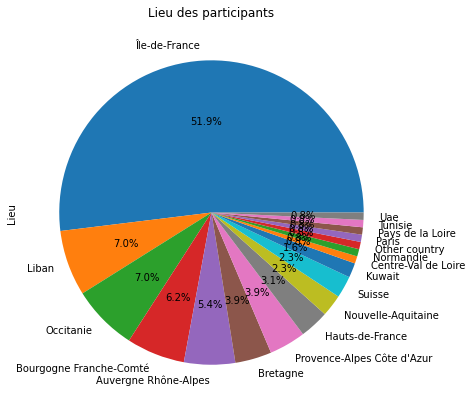

In [10]:
tempDf=dfAll.groupby(getColInd(dfAll,'principale région')).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(kind='pie',figsize=(figWeight,figHeight),title="Lieu des participants",ylabel='Lieu',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Fréquence des sessions de sport'}, ylabel='Fréquence'>

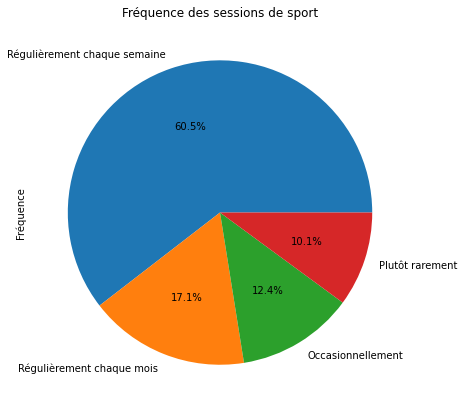

In [11]:
tempDf=dfAll.groupby(dfAll.columns[0]).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(kind='pie',figsize=(figWeight,figHeight),title="Fréquence des sessions de sport",ylabel='Fréquence',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Pratiquez-vous un sport en club'}, ylabel='Club'>

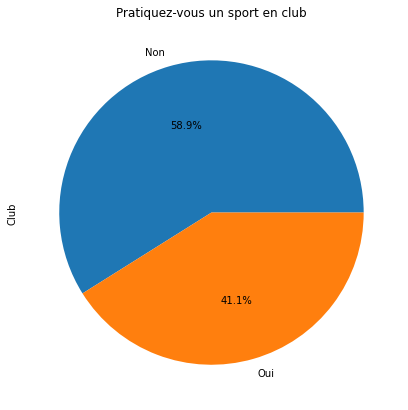

In [12]:
tempDf=dfAll.groupby(dfAll.columns[1]).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(kind='pie',figsize=(figWeight,figHeight),title="Pratiquez-vous un sport en club",ylabel='Club',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Pratiquez-vous un sport en competition'}, ylabel='Competition'>

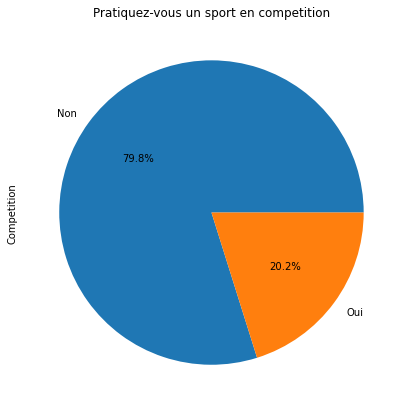

In [13]:
tempDf=dfAll.groupby(dfAll.columns[2]).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(kind='pie',figsize=(figWeight,figHeight),title="Pratiquez-vous un sport en competition",ylabel='Competition',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Sport avec appareil'}, ylabel='Appareil'>

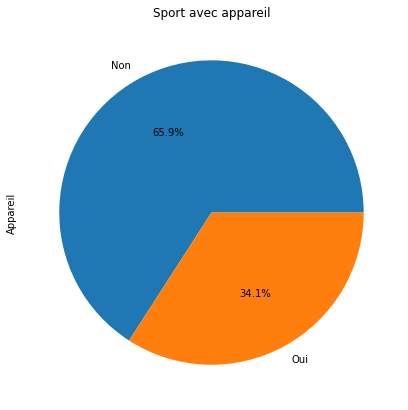

In [14]:
tempDf=dfAll.groupby(dfAll.columns[3]).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(kind='pie',figsize=(figWeight,figHeight),title="Sport avec appareil",ylabel='Appareil',autopct='%1.1f%%')

In [15]:
tempDf=dfAll[dfAll.columns[4]].dropna()
tempDf.sort_values().to_frame()

Si oui quel(s) appareil(s) utilisez-vous ?
72                                         Apple Watch
54                                         Apple watch
51                                         Apple watch
25                                        Apple watch 
110                                       Application 
31                                  Application mobile
122                                Application mobile 
35                          Application sur téléphone 
78                              Application téléphone 
128                                             Fitbit
89                                              Garmin
17                                             Garmin 
88                                       Garmin Venu 2
58                                              Montre
94                                              Montre
76                                             Montre 
37                                       Montre Garmin
71                   Montre Garmin foreverunner 735 xt
81                                     Montre Suunto 9
101                                   Montre connectée
103                                   Montre connectée
109                                   Montre connectée
70                                    Montre connectée
8                                     Montre connectée
9                                     Montre connectée
104                                  Montre connectée 
32                                   Montre connectée 
20                                      Montre coros 2
27                                       Montre garmin
80                                        Montre sunto
127                                        Polar watch
68                                Portable / Runkeeper
55                                     Samsung  watch 
38                                              Strava
64                                             Strava 
82              Suunto 9, Freeletics, Suunto Zoop Novo
99                                     Telephone Apple
87                                          Téléphone 
34                                          Téléphone 
46                                 Velo d'appartement 
49                                                   X
60                                     application tel
59   aucun car cest mauvais on pe se faire mal par ...
106                                               fit 
117                                   montre connectee
56                                   montre connecter 
69    « Santé » sur  iPhone pour la distance parcourue

<AxesSubplot:title={'center':'Obstacles'}, ylabel='Obstacles'>

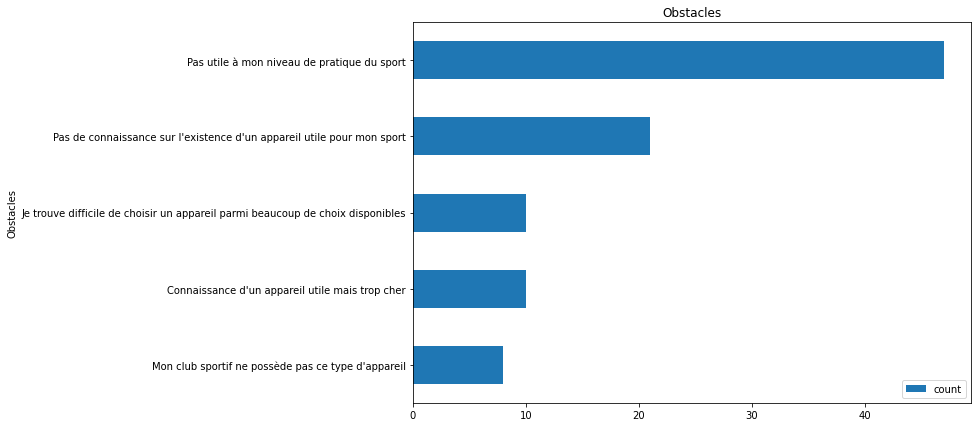

In [16]:
minValues = 2
tempDf = countMultiple(dfAll[dfAll.columns[5]])
tempDf = raisonsMap(tempDf)
tempDf = pd.DataFrame(data=tempDf.values(),columns=["count"],index=tempDf.keys())
tempDfMin = tempDf[tempDf["count"]<=minValues]
tempDf = tempDf[tempDf["count"]>minValues]
tempDf.sort_values(by='count',ascending=True).head().plot(kind='barh',figsize=(10,7),title="Obstacles",ylabel="Obstacles")

In [17]:
tempDfMin.sort_values(by='count',ascending=False)

count
Je n'aime pas courir avec un téléphone dans la ...      1
Flemme                                                  1
c est dangereux                                         1
Pour des renseignements                                 1
Je n'en vois pas l'intérêt                              1
Étant une ancienne sportive en sport Études- je...      1
No need                                                 1

<AxesSubplot:title={'center':'Influence pour utilisation'}, ylabel='Influenceur'>

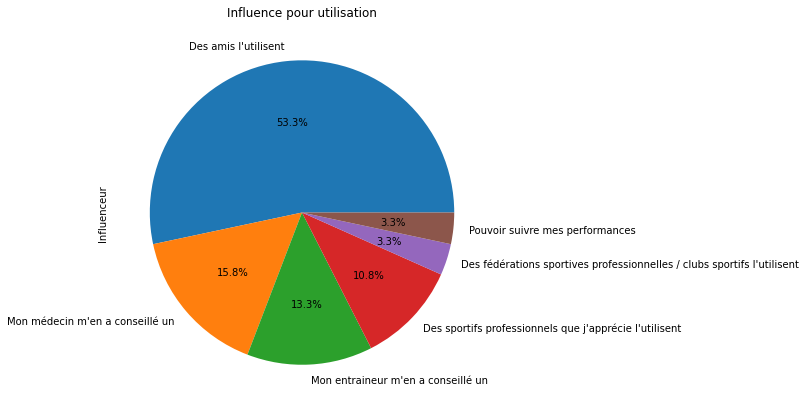

In [18]:
minValues = 2
tempDf=dfAll.groupby(getColInd(dfAll,'influence')).count().sort_values(by='count',ascending=False)
tempDf = influenceMap(tempDf)
tempDf = pd.DataFrame(data=tempDf.values(),columns=["count"],index=tempDf.keys())
tempDfMin = tempDf[tempDf["count"]<=minValues]
tempDf = tempDf[tempDf["count"]>minValues]
tempDf["count"].sort_values(ascending=False).plot(kind='pie',figsize=(figWeight,figHeight),title="Influence pour utilisation",ylabel='Influenceur',autopct='%1.1f%%')
#tempDf.iloc[:,1].plot(kind='barh',figsize=(figWeight,figHeight),title="Influence pour utilisation",ylabel='Influenceur')

In [19]:
tempDfMin['count'].to_frame()

count
Aucun                                                   1
Si je veux prendre le sport serieusement et com...      1
curiosité personnelle, stats                            1
Une nouvelle experience                                 1
Not accurate                                            1
Permet une analyse des entraînements et compéti...      1
Moi même                                                1
Juste la disponibilité de l’app sur mon iphone          1
suggestion téléphone                                    1

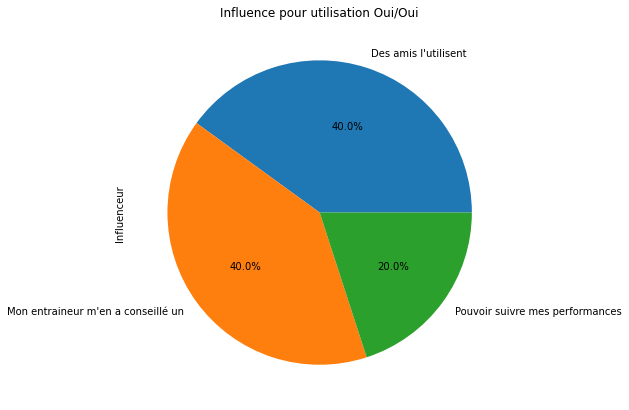

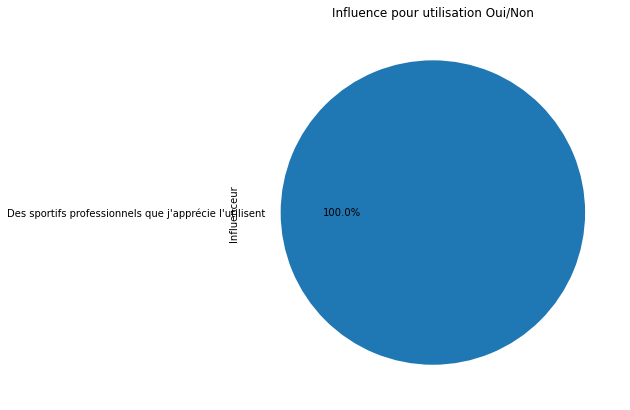

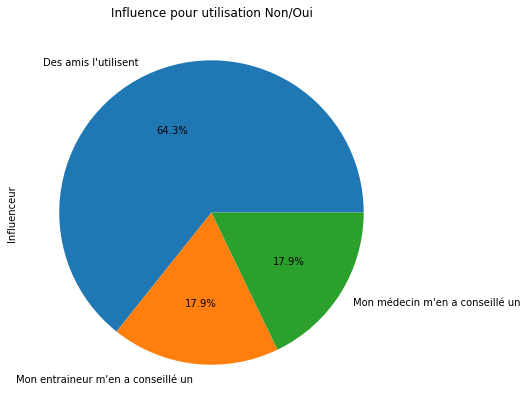

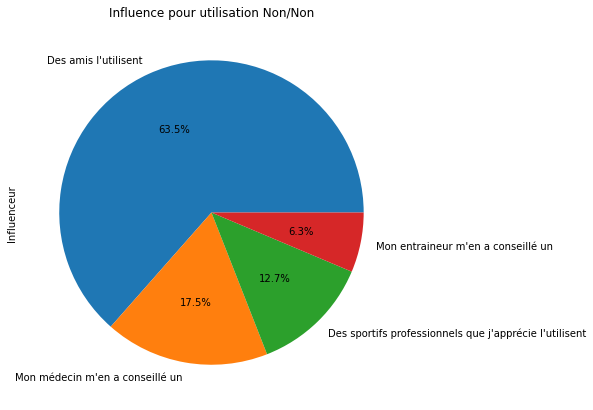

In [20]:
minValues = 2
raisonsBool = ['Oui','Non']
raisonsBool2 = ['Oui','Non']

for r1 in raisonsBool:
    for r2 in raisonsBool2:
        tempDf = dfAll[(dfAll['Pratiquez-vous un sport en compétition ? (tournois sportifs, marathon, championnats, etc)']==r1)&(dfAll['Pratiquez-vous un sport en club sportif ? (salle de sport, club de football, cours de boxe, etc)']==r2)]
        tempDf=tempDf.groupby(getColInd(dfAll,'influence')).count().sort_values(by='count',ascending=False)
        tempDf = influenceMap(tempDf)
        tempDf = pd.DataFrame(data=tempDf.values(),columns=["count"],index=tempDf.keys())
        tempDfMin = tempDf[tempDf["count"]<=minValues]
        tempDf = tempDf[tempDf["count"]>minValues]
        tempDf["count"].sort_values(ascending=False).plot(kind='pie',figsize=(figWeight,figHeight),title=f"Influence pour utilisation {r1}/{r2}",ylabel='Influenceur',autopct='%1.1f%%')
        plt.show()
#tempDf.iloc[:,1].plot(kind='barh',figsize=(figWeight,figHeight),title="Influence pour utilisation",ylabel='Influenceur')

<AxesSubplot:title={'center':"Possession de l'appareil"}, ylabel='Possession'>

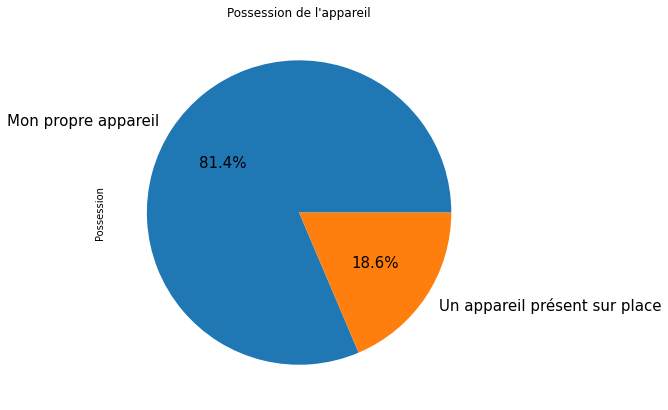

In [25]:
tempDf=dfAll.groupby(getColInd(dfAll,'votre propre appareil')).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(fontsize=15,kind='pie',figsize=(figWeight,figHeight),title="Possession de l'appareil",ylabel='Possession',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Appareil reconditionné'}, ylabel='Possession'>

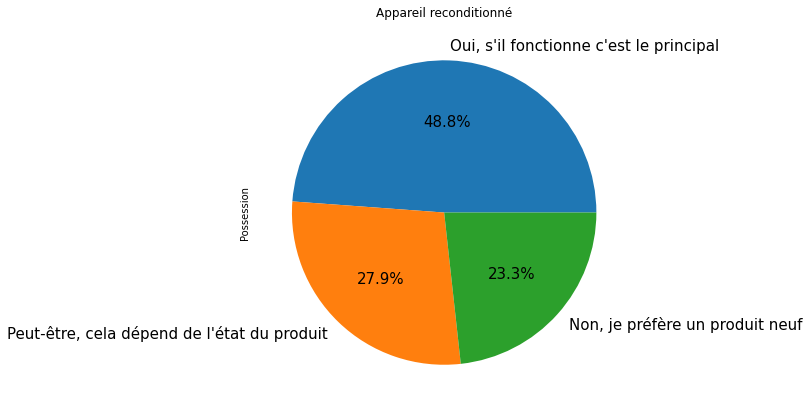

In [26]:
tempDf=dfAll.groupby(getColInd(dfAll,'donc moins cher')).count().sort_values(by='count',ascending=False)
tempDf.iloc[:,1].plot(fontsize=15,kind='pie',figsize=(figWeight,figHeight),title="Appareil reconditionné",ylabel='Possession',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Sport Principal'}, ylabel='Sport'>

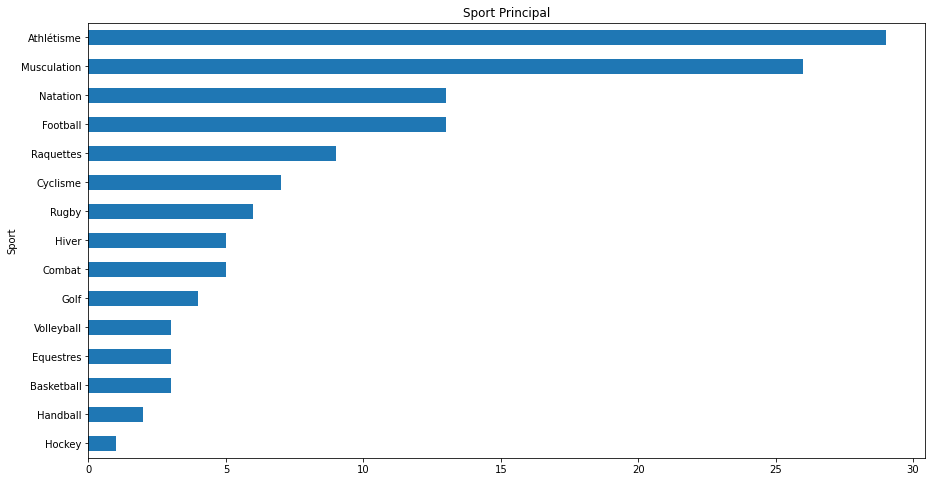

In [27]:
tempDf=dfAll.groupby(dfAll.columns[9]).count().sort_values(by='count',ascending=True)
tempDf.iloc[:,1].plot(kind='barh',figsize=(15,8),title="Sport Principal",ylabel='Sport')

### Uniformisation puis séparation selon les sports

In [28]:
def renameCol(df):
    cols = {}
    for i in df.columns:
        if('approfondi' in i):
            cols[i]='Complexe_Simple'
        elif ("N'hesitez-pas à rajouter" in i):
            cols[i]='Appareils_Utiles'
        elif ("seraient les raisons" in i):
            cols[i]='Raisons'
        elif ("Prix trop élevé" in i):
            cols[i]='Obstacle_Prix'
        elif ("Peur de l'inconfort" in i):
            cols[i]='Obstacle_Inconfort'
        elif ("Peur qu'il soit inutile" in i):
            cols[i]='Obstacle_Inutile'
        elif ("Peur qu'il soit mal utilisé" in i):
            cols[i]='Obstacle_Mauv_Utilisation'
        elif ("mauvaise qualité" in i):
            cols[i]='Obstacle_Qualite'
        elif ("esthétique désagréable" in i):
            cols[i]='Obstacle_Visuel'
        elif ("abonnement pour utiliser" in i):
            cols[i]='Montant_Abonnement'
        elif ("dépenser pour vous procurer" in i):
            cols[i]='Montant_Achat'
        elif ("achat d'un appareil, ou par sa location" in i):
            cols[i]='Achat_Loc'
    df.rename(columns=cols,inplace=True) 
    return df

def nanAchat_Loc(x):
    choice = ['Achat','Location']
    try:
        x = float(x)
        x = random.choice(choice)
        return x
    except:
        if x==0:
            x = random.choice(choice)
            return x
        else:
            return x

In [29]:
sports = {}
for i in range (len(dfAll)):
    tempSport = dfAll['Quel est votre sport principal dans la liste ci-dessous ?'].iloc[i]
    if(tempSport not in sports):
        sports[tempSport] = 1
    else:
        sports[tempSport]+=1
        
dictDF ={}
for sport in sports.keys():
    dictDF[sport] = dfAll[dfAll['Quel est votre sport principal dans la liste ci-dessous ?']==sport]
    dictDF[sport].dropna(axis=1,inplace=True,how='all')
    renameCol(dictDF[sport])
    if 'Achat_Loc' not in dictDF[sport].columns:
        dictDF[sport]['Achat_Loc'] = 0
        dictDF[sport]['Achat_Loc'] = dictDF[sport]['Achat_Loc'].map(nanAchat_Loc)
    dictDF[sport].sort_index(axis=1, ascending=False,inplace=True)
    print(f"Il y a eu {len(dictDF[sport])} réponses pour le sport {sport}")
    

Il y a eu 1 réponses pour le sport Hockey
Il y a eu 9 réponses pour le sport Raquettes
Il y a eu 13 réponses pour le sport Football
Il y a eu 26 réponses pour le sport Musculation
Il y a eu 29 réponses pour le sport Athlétisme
Il y a eu 5 réponses pour le sport Hiver
Il y a eu 13 réponses pour le sport Natation
Il y a eu 6 réponses pour le sport Rugby
Il y a eu 2 réponses pour le sport Handball
Il y a eu 5 réponses pour le sport Combat
Il y a eu 7 réponses pour le sport Cyclisme
Il y a eu 3 réponses pour le sport Volleyball
Il y a eu 3 réponses pour le sport Basketball
Il y a eu 4 réponses pour le sport Golf
Il y a eu 3 réponses pour le sport Equestres


In [30]:
tempDict = {}
for i in dictDF['Hiver']['Appareils_Utiles']:
    allCol = i.split(',')
    for val in allCol:
        if(val.strip() in tempDict.keys()):
            tempDict[val.strip()] += 1
        else:
            tempDict[val.strip()] = 1
tempDict

{'Ski connectés pour des statistiques (de type Rossignol & PIQ)': 3,
 'Analyse vidéo des gestes (de type Dartfish)': 3,
 "Ski connectés pour suivre l'état du matériel et donc éviter les blessures (de type Black Line Ski)": 2,
 'Simulateurs de descente à ski (de type Pro Ski Simulator)': 2}

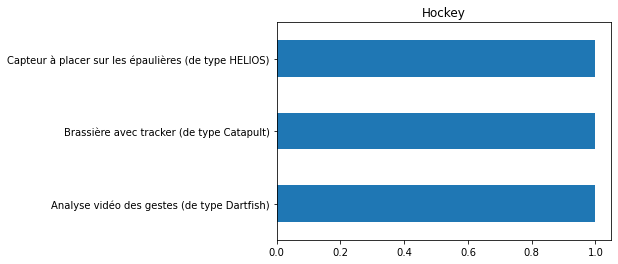

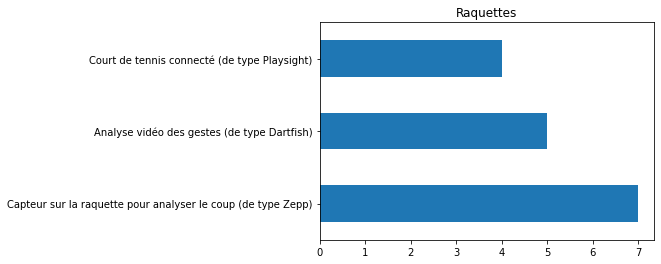

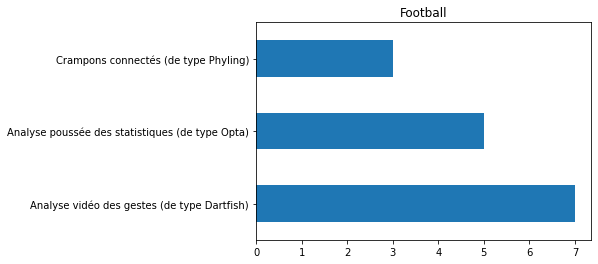

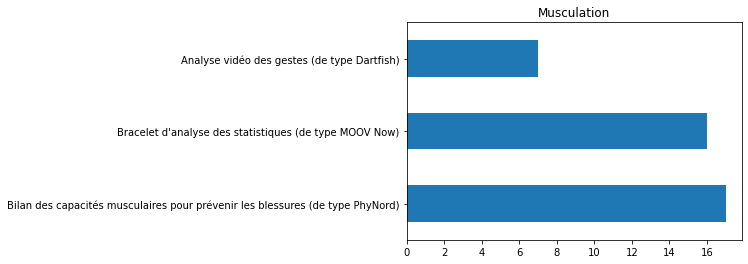

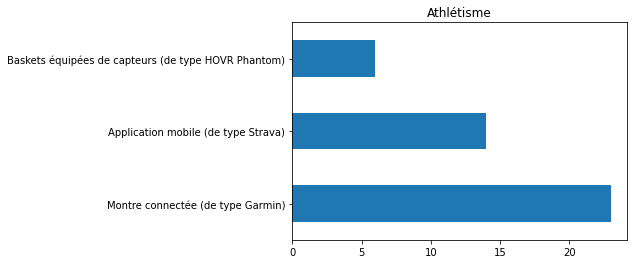

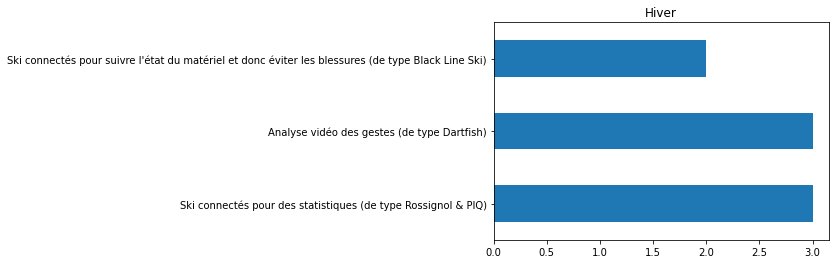

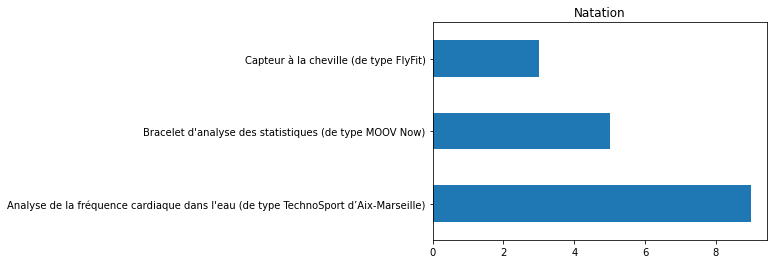

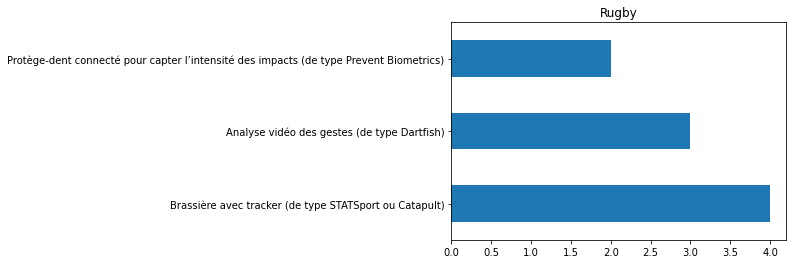

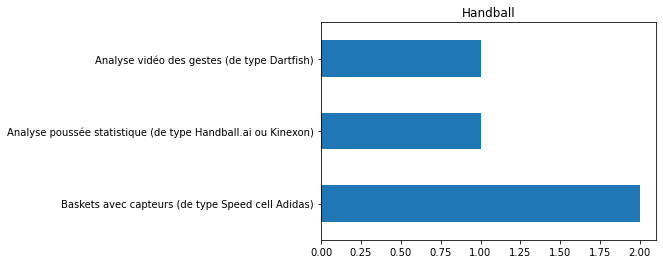

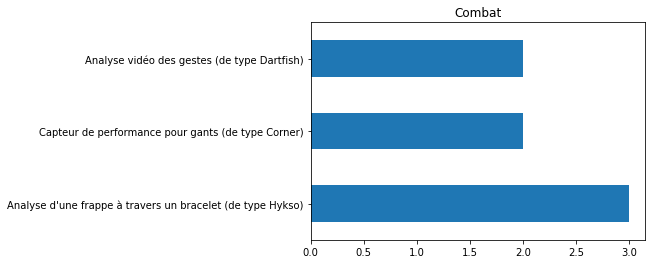

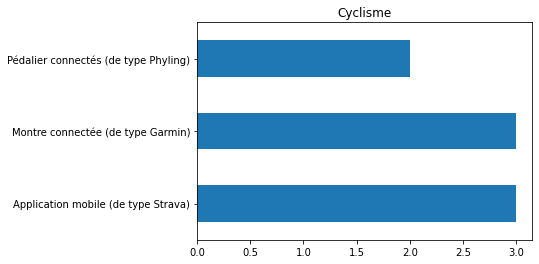

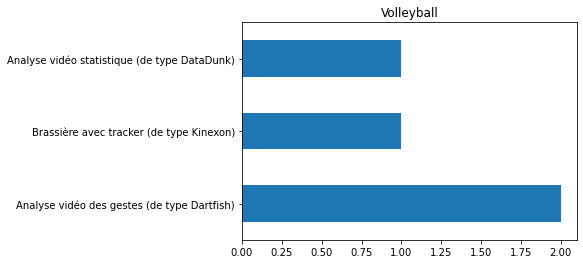

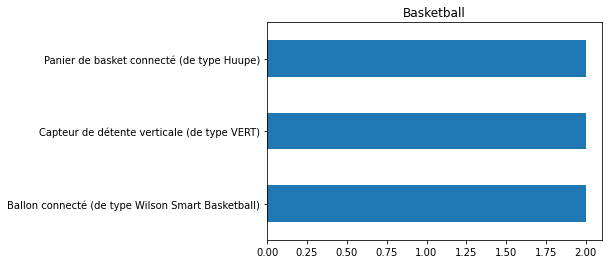

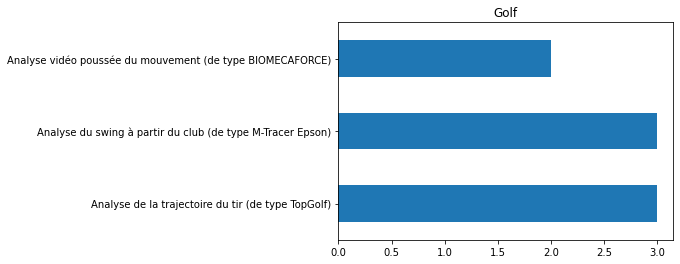

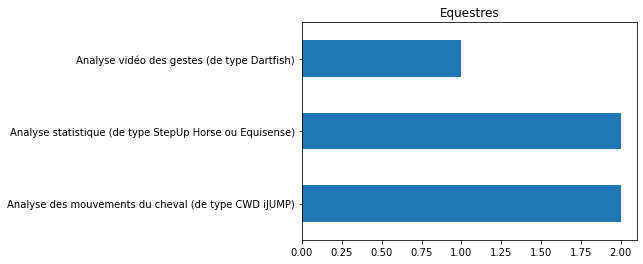

In [31]:
def countMultipleAppareils(dfCol):
    tempDict = {}
    for i in dfCol: 
        try:
            allCol = i.split(',')
            for val in allCol:
                if(val.strip() in tempDict.keys()):
                    tempDict[val.strip()] += 1
                else:
                    tempDict[val.strip()] = 1
        except:
            pass
    return tempDict

for sport in dictDF.keys():
    tempApp = countMultipleAppareils(dictDF[sport]['Appareils_Utiles'])
    tempDf = pd.DataFrame(data=tempApp.values(),columns=["count"],index=tempApp.keys())
    c =tempDf.sort_values(by='count',ascending=False).head(3)
    #print(c)
    c["count"].plot(kind='barh',title=sport)
    plt.show()

In [32]:
def countMultipleSport(dfCol):
    tempDict = {}
    for i in dfCol:
        try:
            allCol = i.split(',')        
            for val in allCol:
                if(val.strip() in tempDict.keys()):
                    tempDict[val.strip()] += 1
                else:
                    tempDict[val.strip()] = 1          
        except:
            print(i)
            pass
    return tempDict


for k in dictDF.keys():
    dfTest = dictDF[k]
    tempDf = countMultipleSport(dfTest[dfTest.columns[4]])
    tempDf = raisonsMap(tempDf)
    tempDf = pd.DataFrame(data=tempDf.values(),columns=["count"],index=tempDf.keys())
    c =tempDf.sort_values(by='count',ascending=False).head(1)
    print(k,":",c.index[0],"->",c["count"].iloc[0])

Hockey : Mon entraineur m'en a conseillé un -> 1
Raquettes : Pouvoir améliorer mes performances -> 9
Football : Pouvoir suivre mes performances -> 10
Musculation : Pouvoir améliorer mes performances -> 18
Athlétisme : Pouvoir suivre mes performances -> 26
Hiver : Des amis l'utilisent -> 2
Natation : Pouvoir suivre mes performances -> 6
Rugby : Pouvoir améliorer mes performances -> 3
Handball : Mon entraineur m'en a conseillé un -> 1
Combat : Pouvoir suivre mes performances -> 4
Cyclisme : Me motiver à pratiquer plus régulièrement mon sport -> 4
Volleyball : Sur conseils de mon médecin pour une rééducation ou suivi médical -> 1
Basketball : Des amis l'utilisent -> 1
Golf : Pouvoir améliorer mes performances -> 3
Equestres : Mon médecin m'en a conseillé un -> 1


In [33]:
for k in dictDF.keys():
    print('Montant_Abonnement et Achat')
    tempDf = dictDF[k].groupby('Montant_Abonnement').count().sort_values(by='count',ascending=False).iloc[:,1:2].head(1).index
    print(k,":",tempDf[0])
    #print('Montant_Achat')
    tempDf = dictDF[k].groupby('Montant_Achat').count().sort_values(by='count',ascending=False).iloc[:,1:2].head(1).index
    print(k,":",tempDf[0])
    tempDf = dictDF[k].groupby('Complexe_Simple').count().sort_values(by='count',ascending=False).iloc[:,1:2].head(1).index
    print(k,":",tempDf[0])
    try:
        tempDf = dictDF[k].groupby('Achat_Loc').count().sort_values(by='count',ascending=False).iloc[:,1:2].head(1).index
        print(k,":",tempDf[0])
    except:
        print("pas de loc")
    tempDf = dictDF[k].groupby("Quelle est votre tranche d'âge ?").count().sort_values(by='count',ascending=False).iloc[:,1:2].head(1).index
    print(k,":",tempDf[0])
    tempDf = dictDF[k].groupby("Quelle est votre principale région de résidence ?").count().sort_values(by='count',ascending=False).iloc[:,1:2].head(1).index
    print(k,":",tempDf[0])
    tempDf = dictDF[k].groupby("Quel est votre secteur d'activité ?").count().sort_values(by='count',ascending=False).iloc[:,1:2].head(1).index
    print(k,":",tempDf[0])
    tempDf = dictDF[k].groupby("Quelle est votre catégorie socio-professionnelle ?").count().sort_values(by='count',ascending=False).iloc[:,1:2].head(1).index
    print(k,":",tempDf[0])
    
    
    


Montant_Abonnement et Achat
Hockey : 0-4,99 euros
Hockey : 0-24 euros
Hockey : Complet mais complexe
Hockey : Achat
Hockey : 15-17 ans
Hockey : Île-de-France
Hockey : Education
Hockey : Etudiant
Montant_Abonnement et Achat
Raquettes : 0-4,99 euros
Raquettes : 50-99 euros
Raquettes : Simplifié mais compréhensible
Raquettes : Achat
Raquettes : 18-24 ans
Raquettes : Île-de-France
Raquettes : Agroalimentaire
Raquettes : Etudiant
Montant_Abonnement et Achat
Football : 0-4,99 euros
Football : 50-99 euros
Football : Simplifié mais compréhensible
Football : Achat
Football : 18-24 ans
Football : Île-de-France
Football : Finance
Football : Etudiant
Montant_Abonnement et Achat
Musculation : 0-4,99 euros
Musculation : 100-299 euros
Musculation : Simplifié mais compréhensible
Musculation : Achat
Musculation : 18-24 ans
Musculation : Île-de-France
Musculation : Informatique  / Télécom
Musculation : Etudiant
Montant_Abonnement et Achat
Athlétisme : 5-9,99 euros
Athlétisme : 100-299 euros
Athlétisme :

In [34]:
tempAllDf = []
for i in dictDF.keys():
    tempAllDf.append(dictDF[i])
result = pd.concat(tempAllDf)
result.head()

À quelle fréquence pratiquez-vous une activité sportive ?  count  \
0                        Régulièrement chaque semaine             0   
1                        Régulièrement chaque semaine             0   
6                           Régulièrement chaque mois             0   
27                       Régulièrement chaque semaine             0   
29                                  Occasionnellement             0   

                        Si non pour quelles raisons ?  \
0   Pas de connaissance sur l'existence d'un appar...   
1   Pas de connaissance sur l'existence d'un appar...   
6         Pas utile à mon niveau de pratique du sport   
27                                                NaN   
29    Connaissance d'un appareil utile mais trop cher   

                                              Raisons  \
0   Pouvoir améliorer mes performances, Pouvoir co...   
1   Pouvoir suivre mes performances, Pouvoir améli...   
6                  Pouvoir améliorer mes performances   
27  Pouvoir suivre mes performances, Pouvoir améli...   
29  Pouvoir suivre mes performances, Pouvoir améli...   

   Qui serait votre principale influence à l'utilisation d'un appareil de suivi des performances ?  \
0                  Mon entraineur m'en a conseillé un                                                
1                  Mon entraineur m'en a conseillé un                                                
6   Des sportifs professionnels que j'apprécie l'u...                                                
27                               Des amis l'utilisent                                                
29                    Mon médecin m'en a conseillé un                                                

   Quelle est votre tranche d'âge ?  \
0                         15-17 ans   
1                         18-24 ans   
6                         18-24 ans   
27                        18-24 ans   
29                        18-24 ans   

   Quelle est votre principale région de résidence ?  \
0                                      Île-de-France   
1                                      Île-de-France   
6                                      Île-de-France   
27                                         Normandie   
29                                     Île-de-France   

   Quelle est votre catégorie socio-professionnelle ?  \
0                                            Etudiant   
1                                            Etudiant   
6                                            Etudiant   
27                                           Etudiant   
29                                           Etudiant   

   Quel est votre sport principal dans la liste ci-dessous ?  \
0                                              Hockey          
1                                           Raquettes          
6                                           Raquettes          
27                                          Raquettes          
29                                          Raquettes          

   Quel est votre secteur d'activité ?  ... Obstacle_Inutile  \
0                            Education  ...              2.0   
1              Informatique  / Télécom  ...              2.0   
6                            Industrie  ...              1.0   
27                     Agroalimentaire  ...              3.0   
29           Communication / Marketing  ...              3.0   

   Obstacle_Inconfort Montant_Achat Montant_Abonnement  \
0                 2.0    0-24 euros       0-4,99 euros   
1                 4.0   25-49 euros       0-4,99 euros   
6                 1.0   50-99 euros       0-4,99 euros   
27                2.0   50-99 euros       0-4,99 euros   
29                2.0   50-99 euros       0-4,99 euros   

    Lors de la pratique de votre sport, utilisez-vous un appareil de suivi de vos performances ? (montre connectée, capteur sur soi, application mobile, etc)  \
0                                                 Non                             

<AxesSubplot:title={'center':'Motivations'}, ylabel='Motivations'>

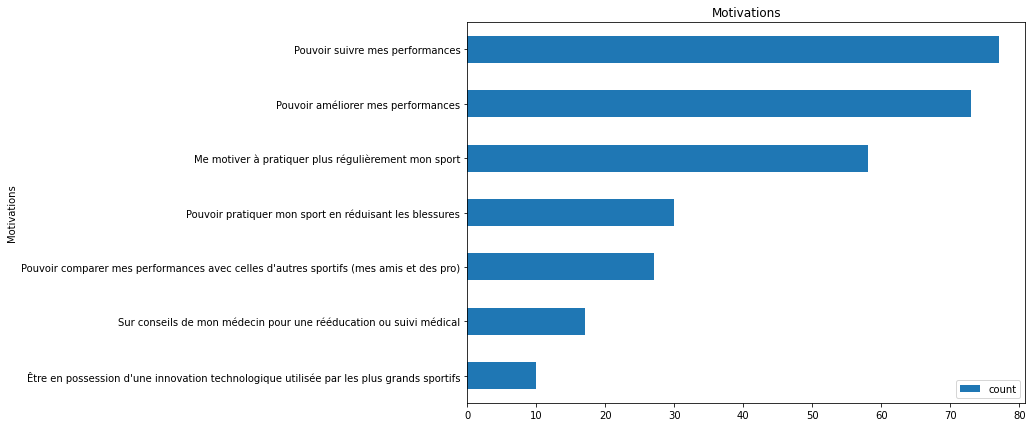

In [35]:
tempDf = countMultiple(result['Raisons'])
tempDf = raisonsOuiMap(tempDf)
tempDf = pd.DataFrame(data=tempDf.values(),columns=["count"],index=tempDf.keys())
tempDf.sort_values(by='count',ascending=True).plot(kind='barh',figsize=(10,7),title="Motivations",ylabel="Motivations")

<AxesSubplot:title={'center':'Du plus important au moins important'}>

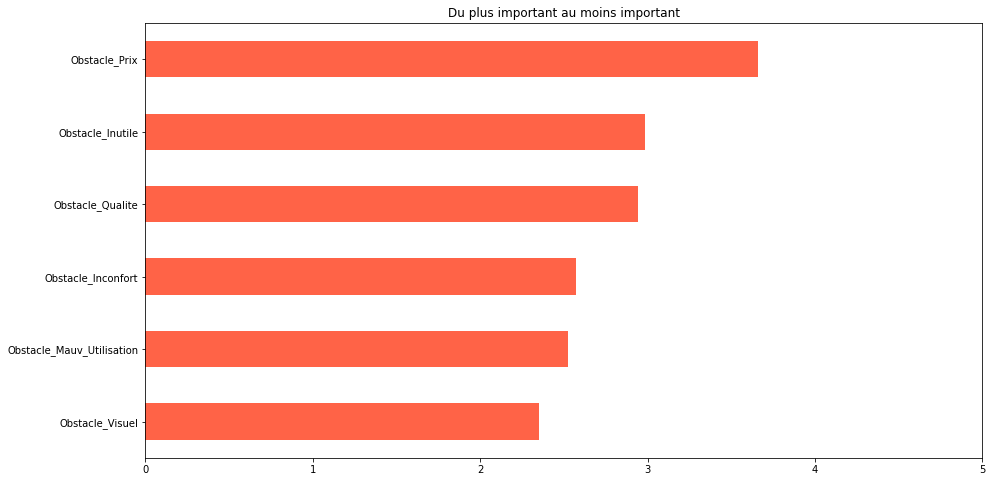

In [36]:
dfObs = result[['Obstacle_Qualite','Obstacle_Prix','Obstacle_Mauv_Utilisation','Obstacle_Inutile','Obstacle_Inconfort','Obstacle_Visuel']]
dfObs.mean().sort_values(ascending=True).plot(xlim=[0,5],kind='barh',figsize=(15,8),title="Du plus important au moins important",color='tomato')

<AxesSubplot:title={'center':'Appareils Utiles'}, ylabel='Obstacles'>

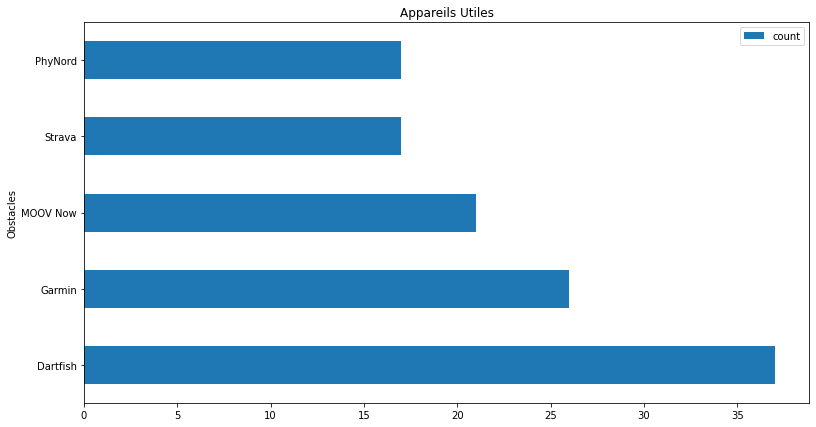

In [37]:
tempDf = getParVal(countMultiple(result['Appareils_Utiles']))
tempDf = pd.DataFrame(data=tempDf.values(),columns=["count"],index=tempDf.keys())
tempDf.sort_values(by='count',ascending=False).head().plot(kind='barh',figsize=(13,7),title="Appareils Utiles",ylabel="Obstacles")

In [38]:
tempDf.sort_values(by='count',ascending=False)

count
Dartfish                                       37
Garmin                                         26
MOOV Now                                       21
Strava                                         17
PhyNord                                        17
TechnoSport d’Aix-Marseille                     9
STATSport ou Catapult                           8
Phyling                                         7
PhyLift                                         7
Zepp                                            7
HOVR Phantom                                    6
Opta                                            5
PhyPlate                                        4
Playsight                                       4
Speed cell Adidas                               4
Tennis Analytic                                 4
M-Tracer Epson                                  3
TopGolf                                         3
FlyFit                                          3
Hykso                                           3
VERT                                            3
Rossignol & PIQ                                 3
Pop de Babolat & Piq                            3
Playermaker CITYPLAY                            3
Black Line Ski                                  2
Pro Ski Simulator                               2
GraffGolf                                       2
Wilson Smart Basketball                         2
BIOMECAFORCE                                    2
CWD iJUMP                                       2
Huupe                                           2
Corner                                          2
StepUp Horse ou Equisense                       2
Prevent Biometrics                              2
Aquanex analysis                                1
HELIOS                                          1
Zwift                                           1
P2C - Prévention des Commotions Cérébrales      1
CEEFIT                                          1
I-Percut                                        1
Guardlab                                        1
KiSwim                                          1
DataDunk                                        1
Kinexon                                         1
Handball.ai ou Kinexon                          1
Catapult                                        1
Magellan Echo Fit                               1
Motionysis                                      1
LifeBeam Helmet                                 1
DeepStrike                                      1
Shot Tracker                                    1

<AxesSubplot:title={'center':'Montant Achat'}, ylabel='Montant'>

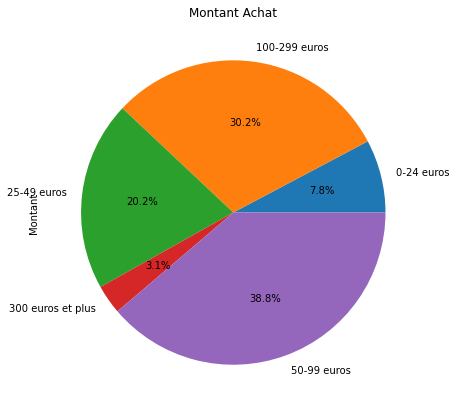

In [39]:
dfObs=result.groupby('Montant_Achat').count()#.sort_values(by='Genre',ascending=False)
dfObs['count'].plot(kind="pie",figsize=(figWeight,figHeight),title="Montant Achat",ylabel='Montant',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Montant Abonnement'}, ylabel='Montant'>

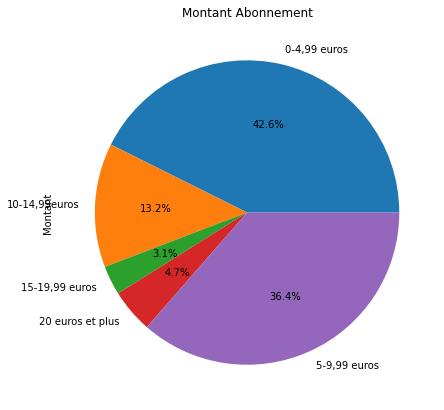

In [40]:
dfObs=result.groupby('Montant_Abonnement').count()#.sort_values(by='count',ascending=True)
dfObs['count'].plot(kind="pie",figsize=(figWeight,figHeight),title="Montant Abonnement",ylabel='Montant',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Complexité appareil'}, ylabel='Complexité'>

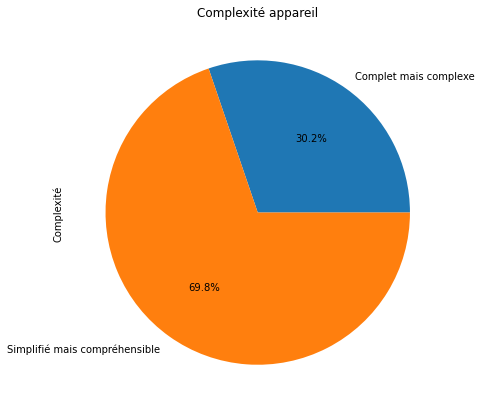

In [41]:
dfObs=result.groupby('Complexe_Simple').count()#.sort_values(by='count',ascending=False)
dfObs['count'].plot(kind="pie",figsize=(figWeight,figHeight),title="Complexité appareil",ylabel='Complexité',autopct='%1.1f%%')

<AxesSubplot:title={'center':'Achat ou Location'}, ylabel='Achat/Location'>

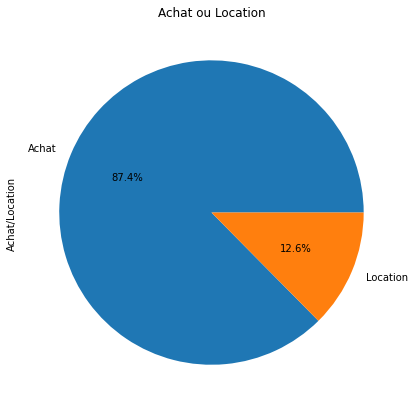

In [42]:
dfObs=result.groupby('Achat_Loc').count()#.sort_values(by='Genre',ascending=False)
dfObs['count'].plot(kind="pie",figsize=(figWeight,figHeight),title="Achat ou Location",ylabel='Achat/Location',autopct='%1.1f%%')

### Analyse par Age

In [43]:
#Colonnes à analyser
statNames = ["Montant_Abonnement","Montant_Achat",
             "Qui serait votre principale influence à l'utilisation d'un appareil de suivi des performances ?",
             "Préfèreriez-vous avoir votre propre appareil, ou bien utiliser un appareil présent directement à l'endroit où vous pratiquer votre sport ?",
             "Est-ce que l'achat d'un appareil reconditionné / d'occasion, et donc moins cher, vous intéresserait ?",
             "Complexe_Simple","Achat_Loc",
             "Quel est votre sport principal dans la liste ci-dessous ?"]

Il y a eu 9 réponses pour l'âge 15-17 ans
Il y a eu 52 réponses pour l'âge 18-24 ans
Il y a eu 15 réponses pour l'âge 55 ans et plus
Il y a eu 23 réponses pour l'âge 45-55 ans
Il y a eu 19 réponses pour l'âge 25-34 ans
Il y a eu 11 réponses pour l'âge 35-44 ans


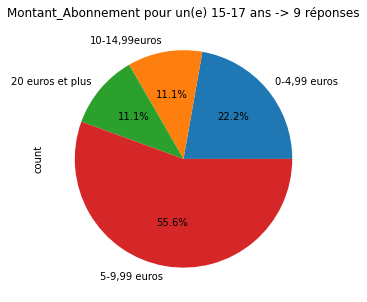

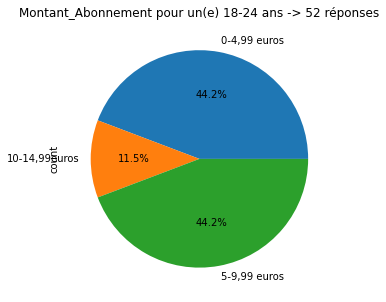

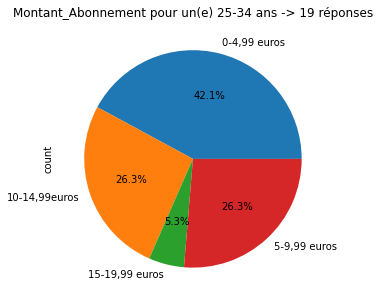

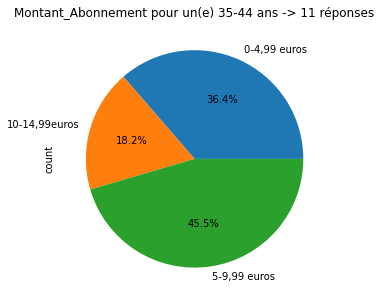

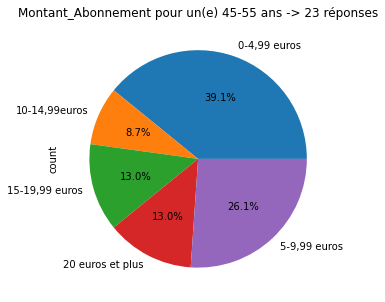

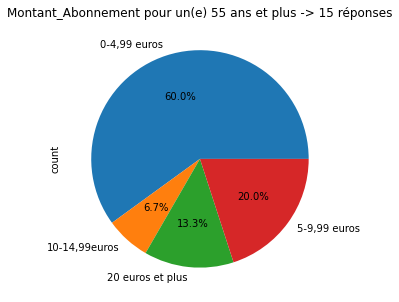

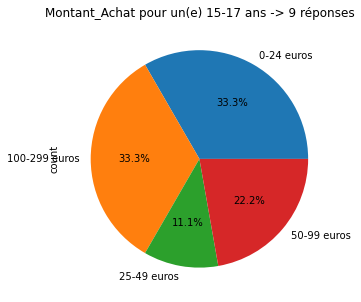

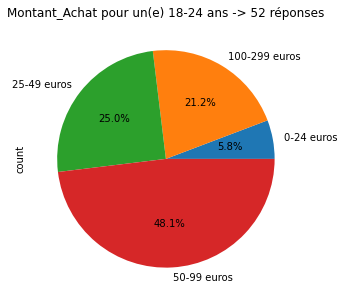

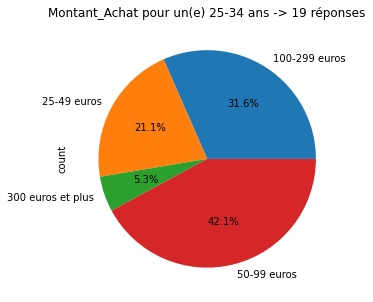

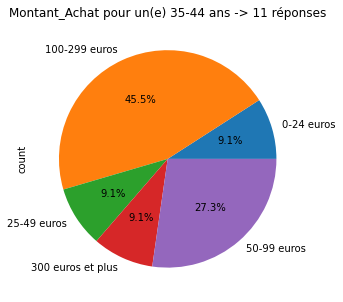

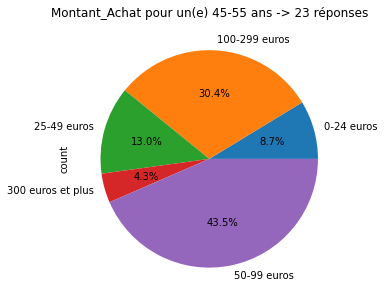

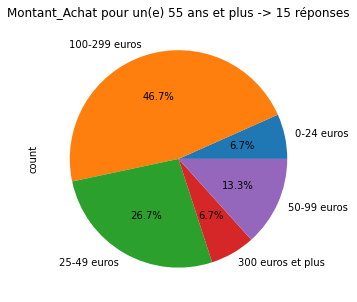

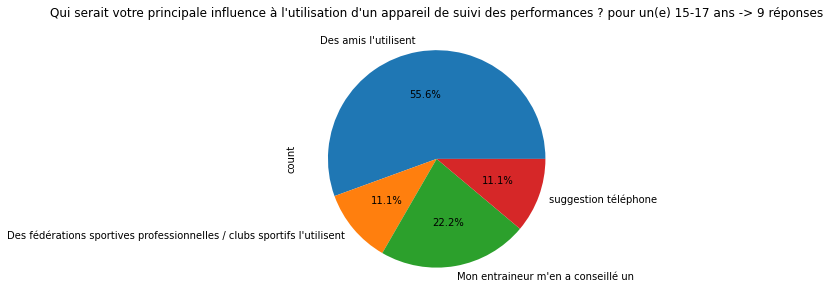

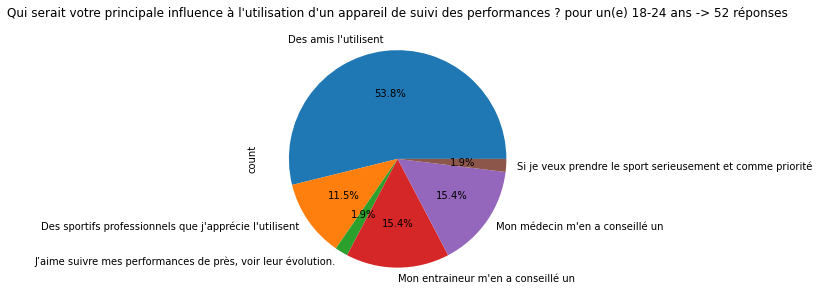

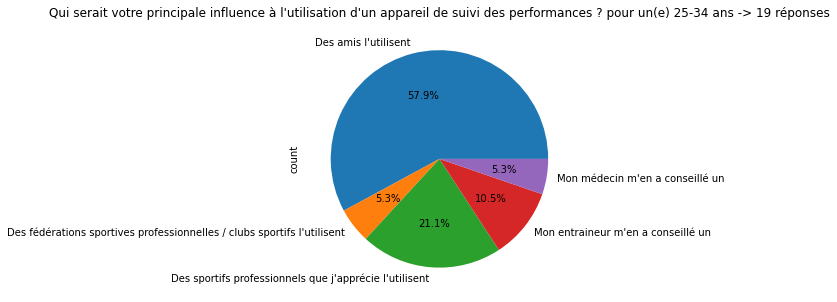

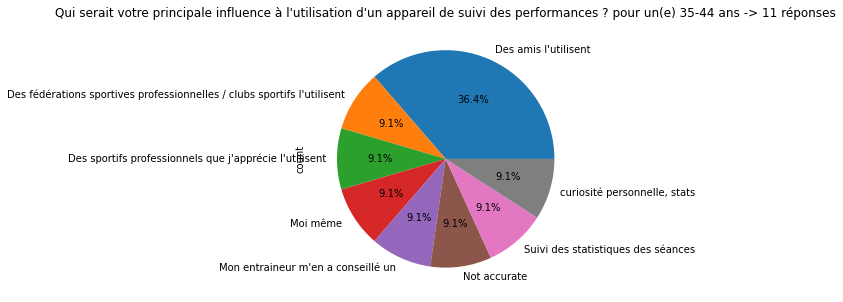

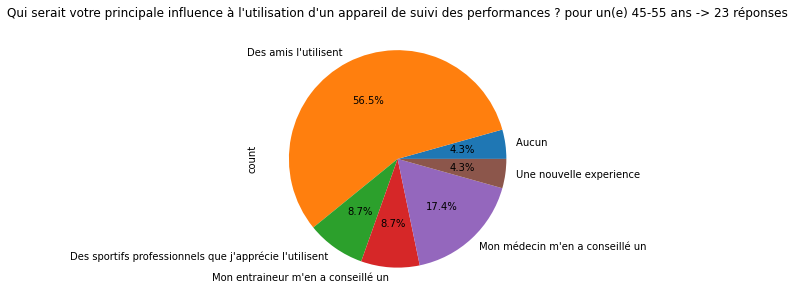

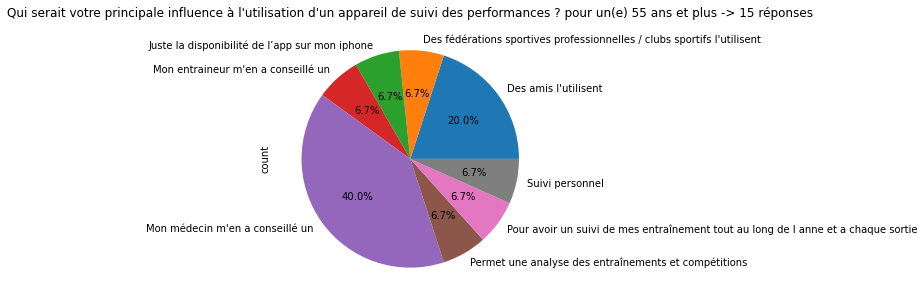

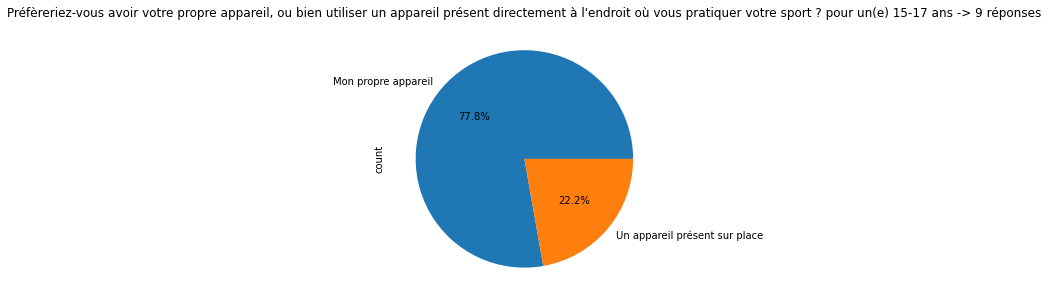

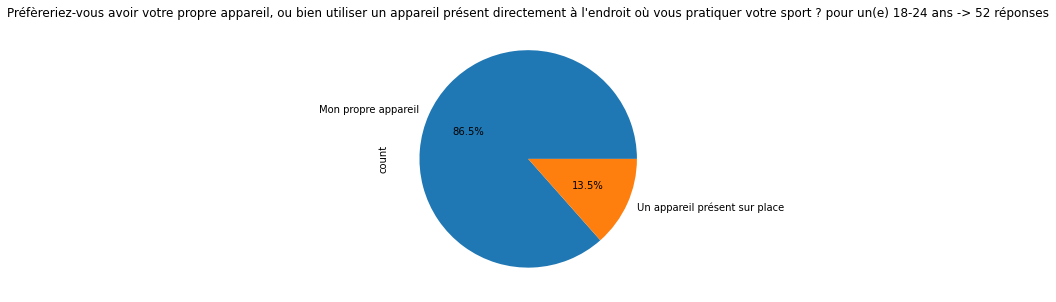

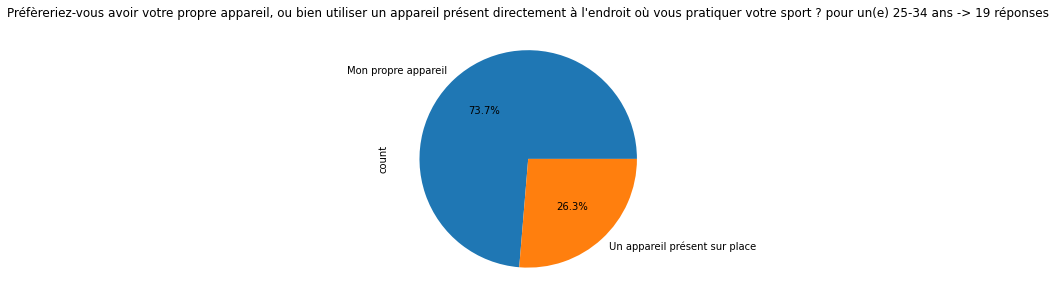

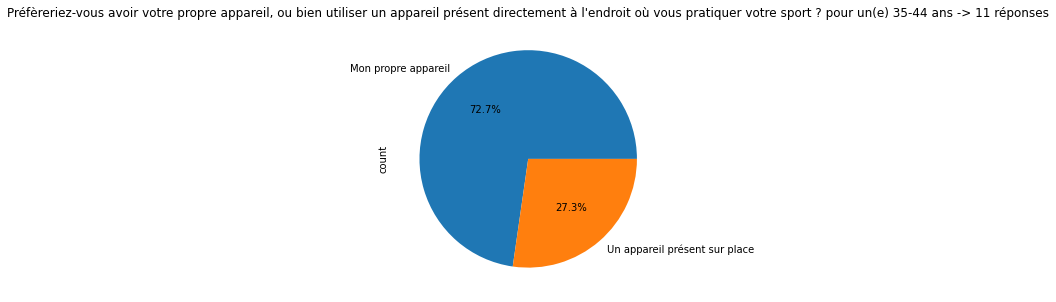

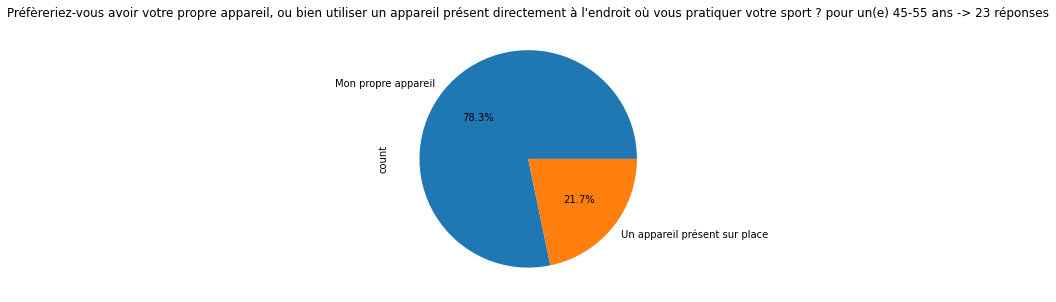

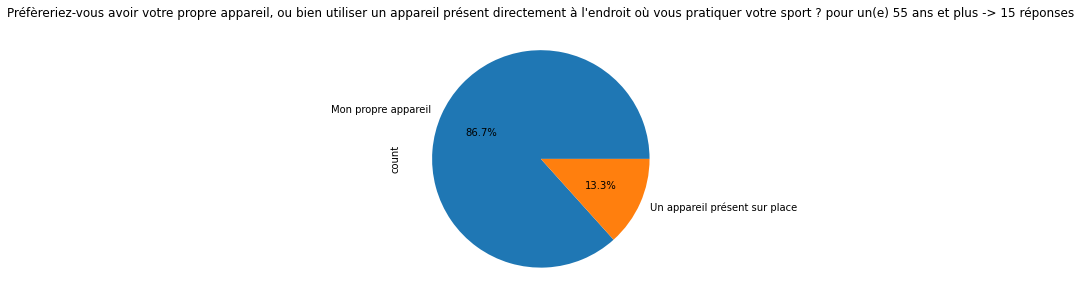

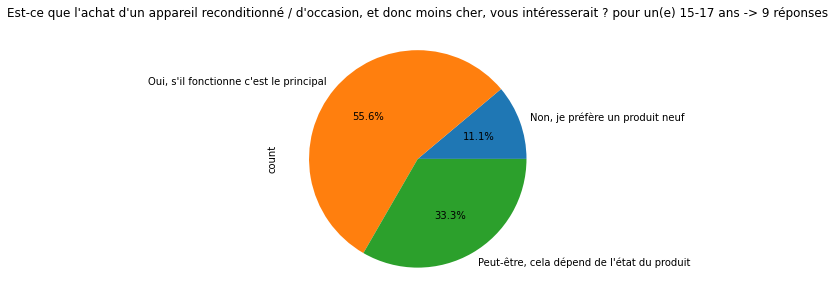

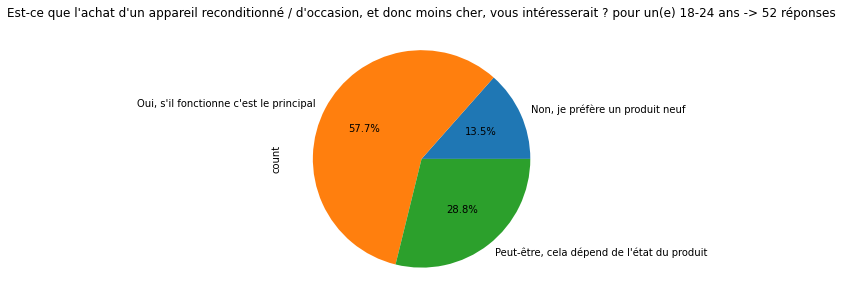

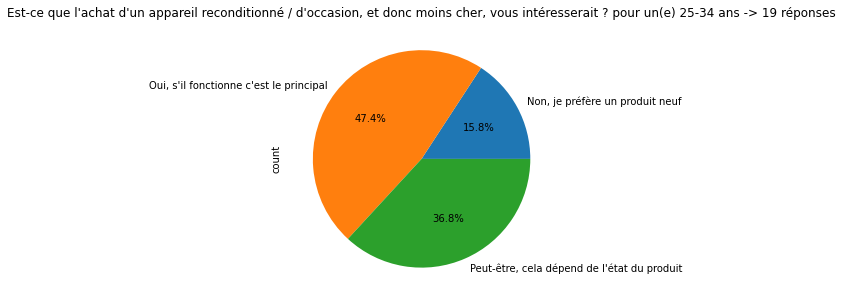

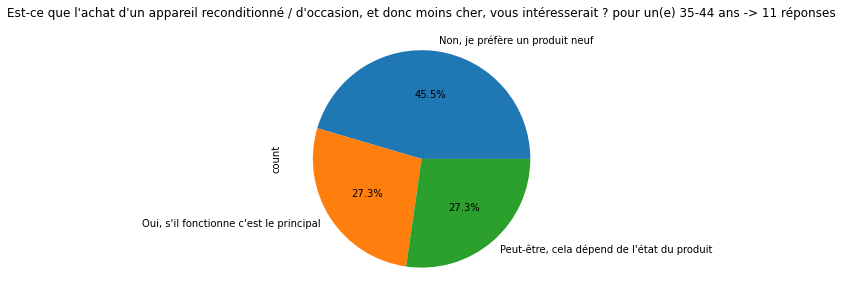

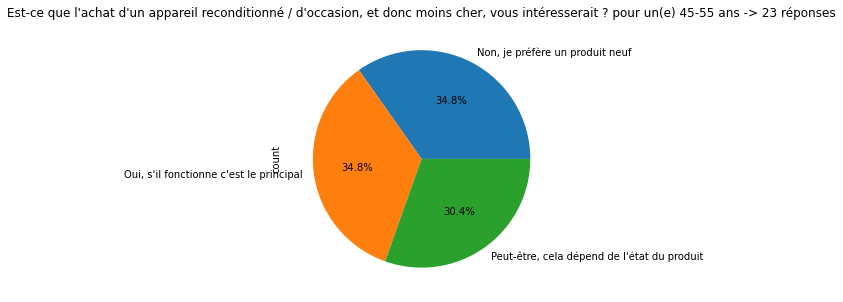

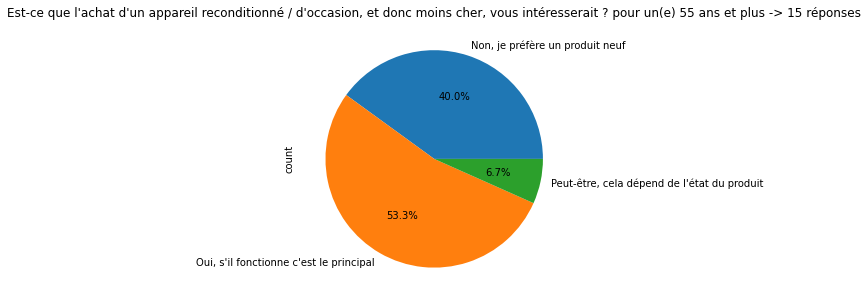

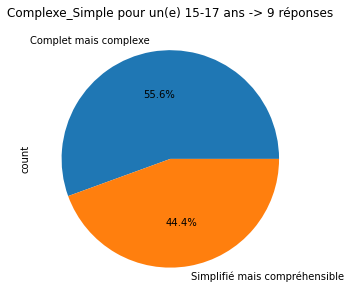

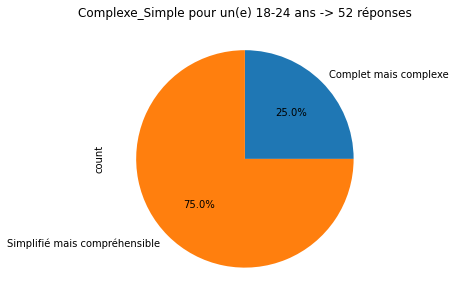

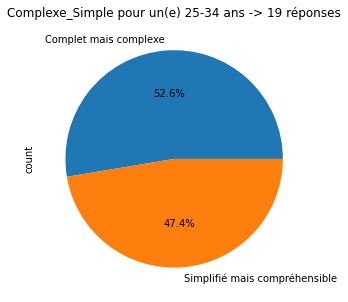

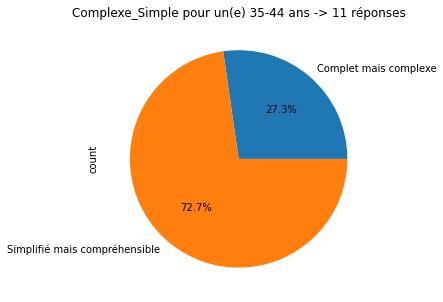

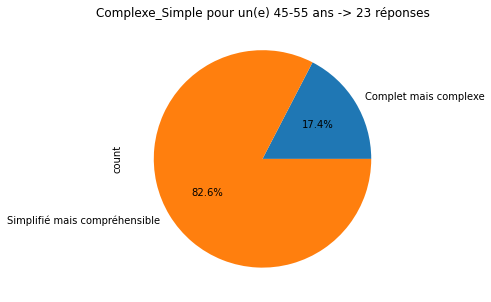

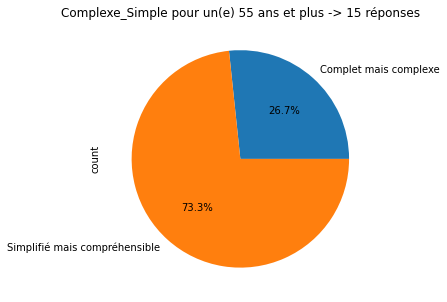

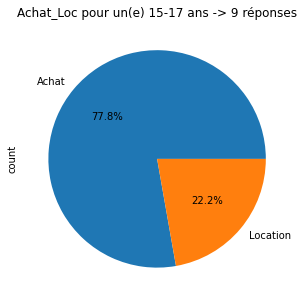

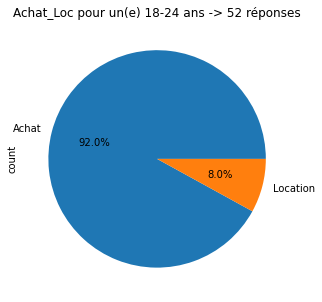

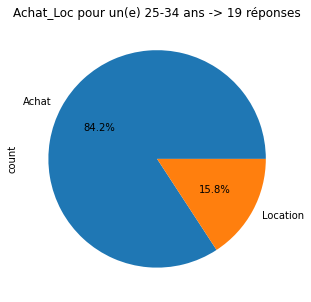

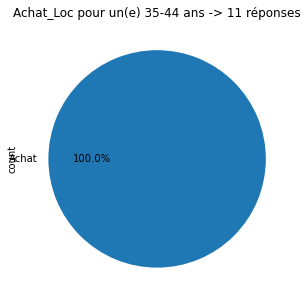

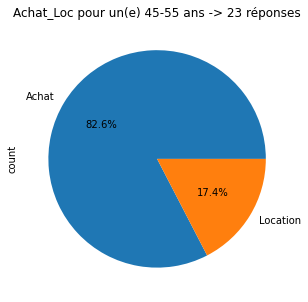

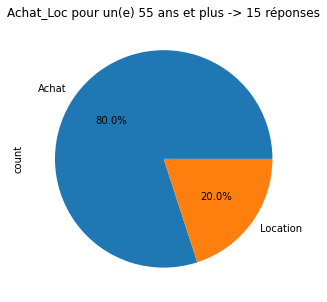

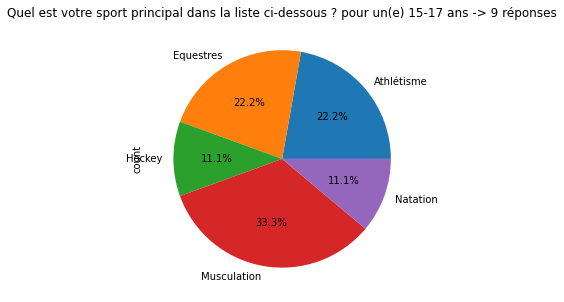

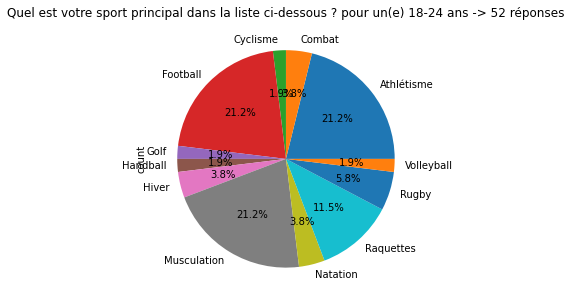

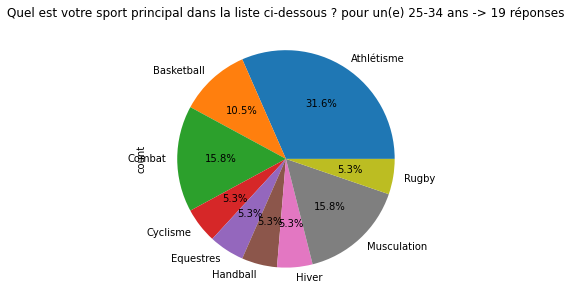

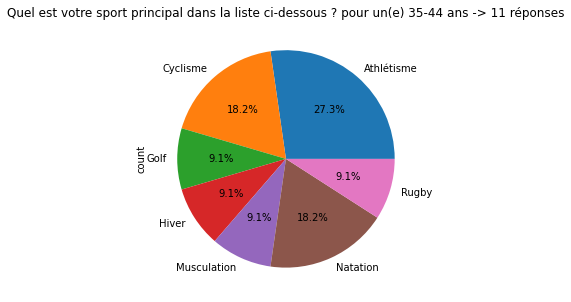

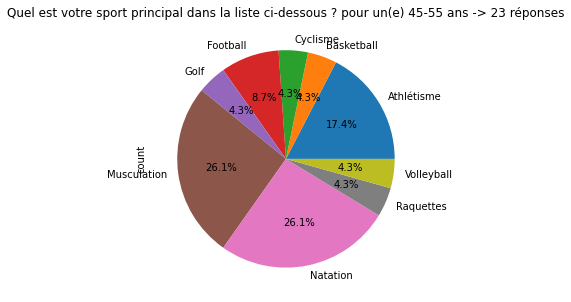

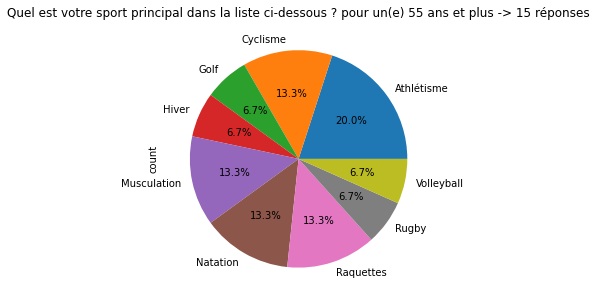

In [44]:

ages = {}
for i in range (len(result)):
    tempAge = result["Quelle est votre tranche d'âge ?"].iloc[i]
    if(tempAge not in ages):
        ages[tempAge] = 1
    else:
        ages[tempAge]+=1

ageDict ={}
for curAges in ages.keys():
    ageDict[curAges] = result[result["Quelle est votre tranche d'âge ?"]==curAges]
    ageDict[curAges].dropna(axis=1,inplace=True,how='all')
    renameCol(ageDict[curAges])
    ageDict[curAges].sort_index(axis=1, ascending=False,inplace=True)
    print(f"Il y a eu {len(ageDict[curAges])} réponses pour l'âge {curAges}")
    
ageDict = dict(sorted(ageDict.items()))

#Graph    
for stat in statNames:
    for k in ageDict.keys():
        ageDict[k].groupby(by=stat).count().plot(kind='pie',y='count',figsize=(5,5),title=f"{stat} pour un(e) {k} -> {len(ageDict[k])} réponses",autopct='%1.1f%%',legend=False)


In [45]:
"""
colFilter = ["Quelle est votre tranche d'âge ?",'Montant_Abonnement']
tempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])
tempDf["count"].to_frame()

colFilter = ["Quelle est votre tranche d'âge ?",'Montant_Achat']
tempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])
tempDf["count"].to_frame()

colFilter = ["Quelle est votre tranche d'âge ?","Qui serait votre principale influence à l'utilisation d'un appareil de suivi des performances ?"]
tempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])
tempDf = tempDf[tempDf["count"]>1]
tempDf["count"].to_frame()

colFilter = ["Quelle est votre tranche d'âge ?","Préfèreriez-vous avoir votre propre appareil, ou bien utiliser un appareil présent directement à l'endroit où vous pratiquer votre sport ?"]
tempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])
tempDf["count"].to_frame()

colFilter = ["Quelle est votre tranche d'âge ?","Est-ce que l'achat d'un appareil reconditionné / d'occasion, et donc moins cher, vous intéresserait ?"]
tempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])
tempDf["count"].to_frame()

colFilter = ["Quelle est votre tranche d'âge ?","Complexe_Simple"]
tempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])
tempDf["count"].to_frame()

colFilter = ["Quelle est votre tranche d'âge ?","Achat_Loc"]
tempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])
tempDf["count"].to_frame()
"""

'\ncolFilter = ["Quelle est votre tranche d\'âge ?",\'Montant_Abonnement\']\ntempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])\ntempDf["count"].to_frame()\n\ncolFilter = ["Quelle est votre tranche d\'âge ?",\'Montant_Achat\']\ntempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])\ntempDf["count"].to_frame()\n\ncolFilter = ["Quelle est votre tranche d\'âge ?","Qui serait votre principale influence à l\'utilisation d\'un appareil de suivi des performances ?"]\ntempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])\ntempDf = tempDf[tempDf["count"]>1]\ntempDf["count"].to_frame()\n\ncolFilter = ["Quelle est votre tranche d\'âge ?","Préfèreriez-vous avoir votre propre appareil, ou bien utiliser un appareil présent directement à l\'endroit où vous pratiquer votre sport ?"]\ntempDf=result.groupby(colFilter).count().sort_values(by=colFilter,ascending=[True,True])\ntempDf["count"].to_frame

### Analyse par genre

Il y a eu 66 réponses pour le genre Homme
Il y a eu 60 réponses pour le genre Femme
Il y a eu 3 réponses pour le genre Je ne souhaite pas le préciser
Suppression des données de moins de 10
Suppression de : Je ne souhaite pas le préciser


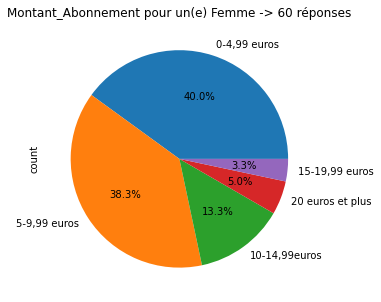

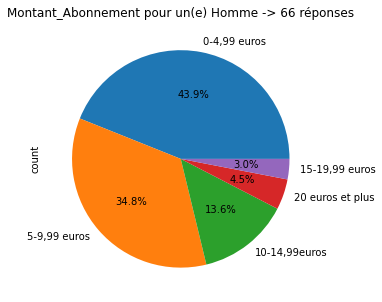

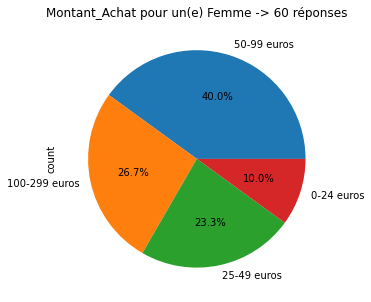

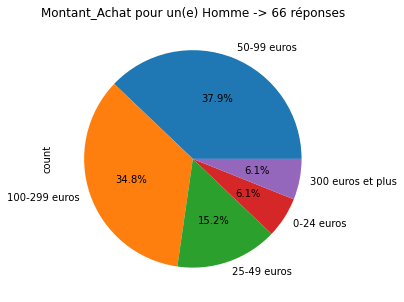

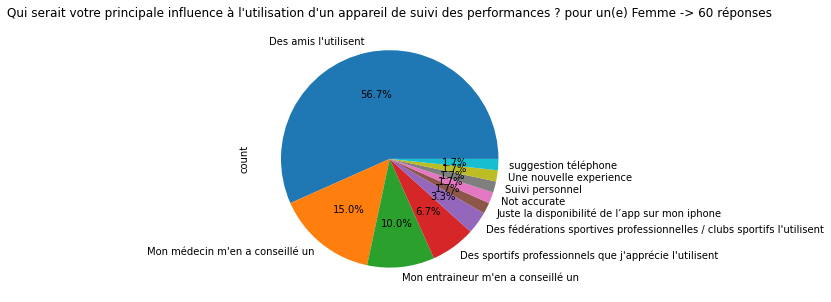

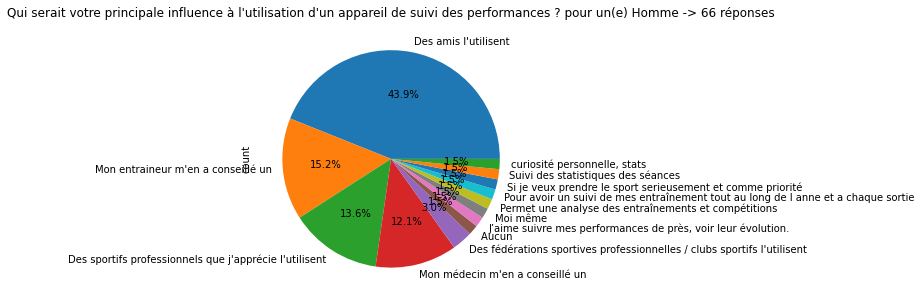

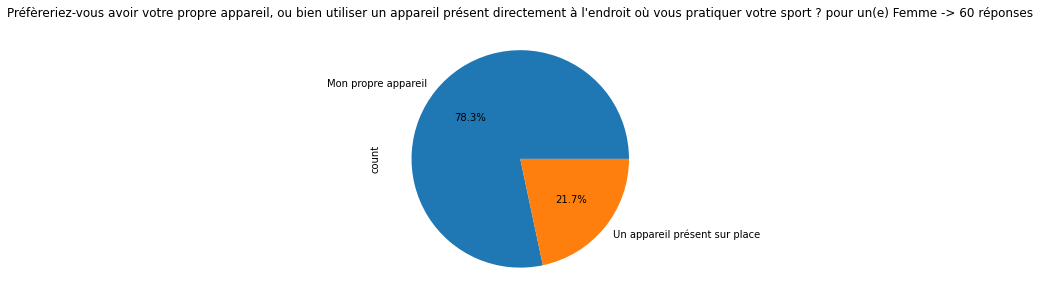

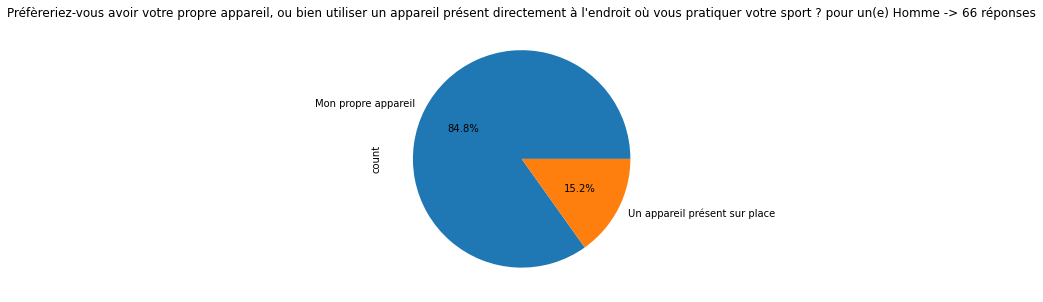

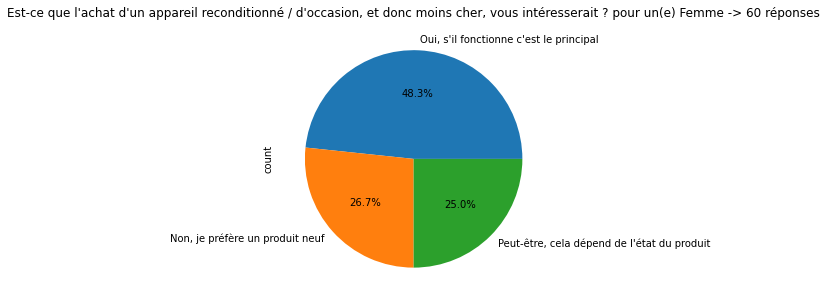

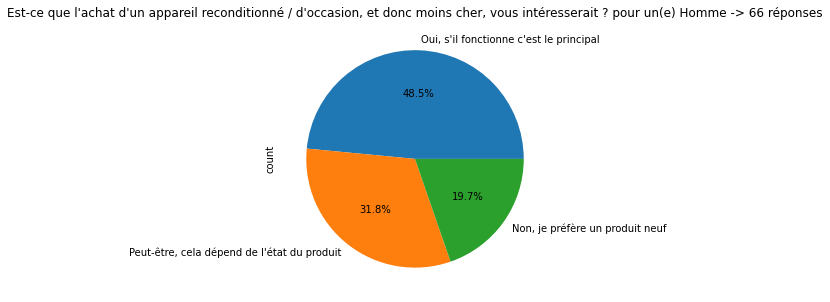

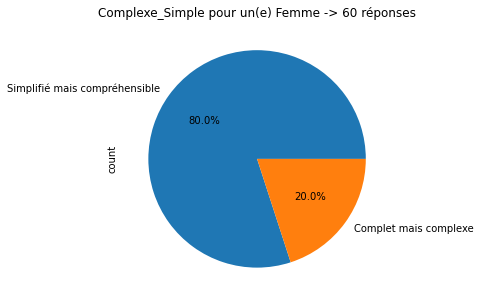

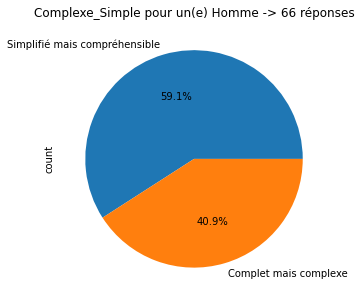

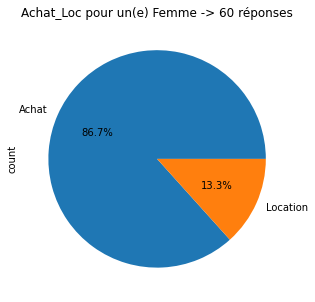

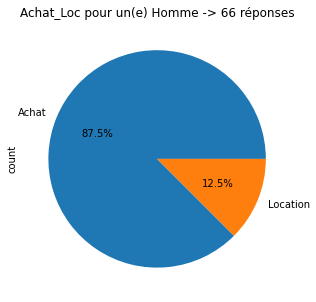

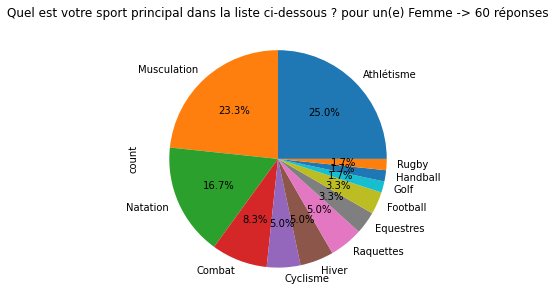

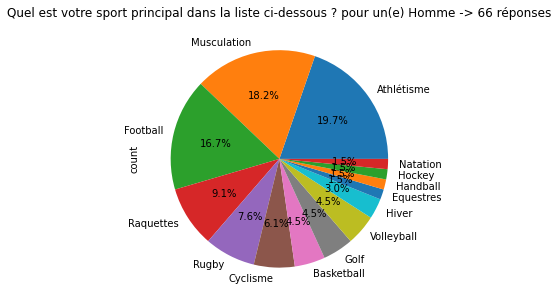

In [46]:
genres = {}
for i in range (len(result)):
    tempGenre = result["Quel est votre genre ?"].iloc[i]
    if(tempGenre not in genres):
        genres[tempGenre] = 1
    else:
        genres[tempGenre]+=1

genreDict ={}
for curgenres in genres.keys():
    genreDict[curgenres] = result[result["Quel est votre genre ?"]==curgenres]
    genreDict[curgenres].dropna(axis=1,inplace=True,how='all')
    renameCol(genreDict[curgenres])
    genreDict[curgenres].sort_index(axis=1, ascending=False,inplace=True)
    print(f"Il y a eu {len(genreDict[curgenres])} réponses pour le genre {curgenres}")
    
genreDict = dict(sorted(genreDict.items()))
        
delList=[]
minNb = 10
for k in genreDict.keys():
    if(len(genreDict[k])<=minNb):delList.append(k)
      
print("Suppression des données de moins de",minNb)
for i in delList:
    print("Suppression de :",i)
    del genreDict[i]
    
#Graph    
for stat in statNames:
    for k in genreDict.keys():
        genreDict[k].groupby(by=stat).count().sort_values(by='count',ascending=False).plot(kind='pie',y='count',figsize=(5,5),title=f"{stat} pour un(e) {k} -> {len(genreDict[k])} réponses",autopct='%1.1f%%',legend=False)

### Analyse par lieu

Il y a eu 67 réponses pour le lieu Île-de-France
Il y a eu 1 réponses pour le lieu Normandie
Il y a eu 1 réponses pour le lieu Uae
Il y a eu 3 réponses pour le lieu Suisse
Il y a eu 7 réponses pour le lieu Auvergne Rhône-Alpes
Il y a eu 9 réponses pour le lieu Liban
Il y a eu 9 réponses pour le lieu Occitanie
Il y a eu 5 réponses pour le lieu Bretagne
Il y a eu 5 réponses pour le lieu Provence-Alpes Côte d'Azur
Il y a eu 4 réponses pour le lieu Hauts-de-France
Il y a eu 8 réponses pour le lieu Bourgogne Franche-Comté
Il y a eu 1 réponses pour le lieu Other country
Il y a eu 2 réponses pour le lieu Kuwait
Il y a eu 3 réponses pour le lieu Nouvelle-Aquitaine
Il y a eu 1 réponses pour le lieu Pays de la Loire
Il y a eu 1 réponses pour le lieu Centre-Val de Loire
Il y a eu 1 réponses pour le lieu Paris
Il y a eu 1 réponses pour le lieu Tunisie 
Suppression des données de moins de 6


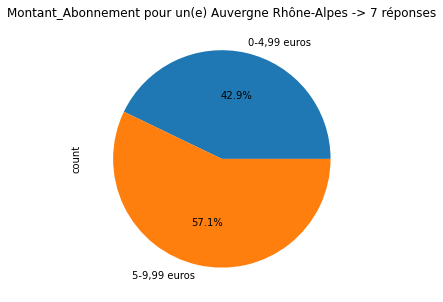

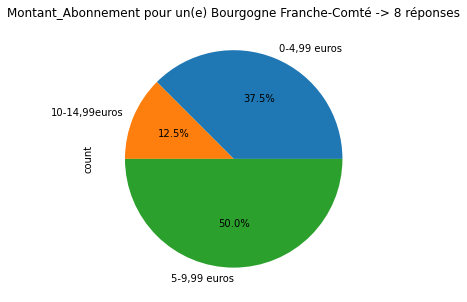

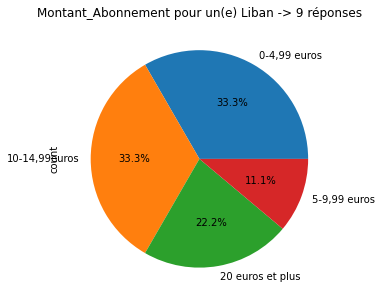

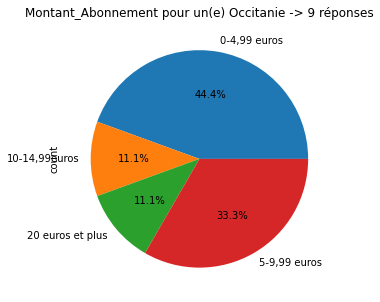

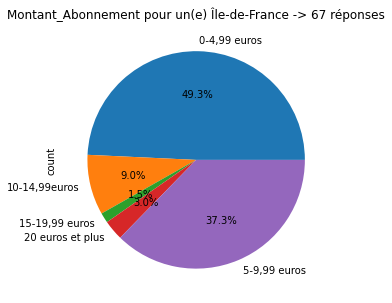

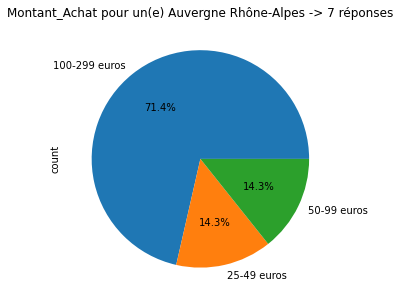

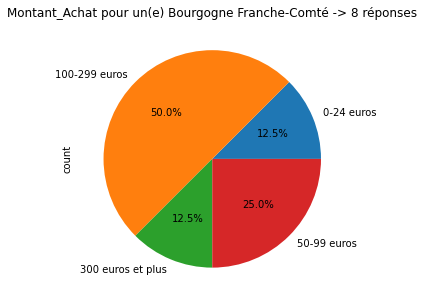

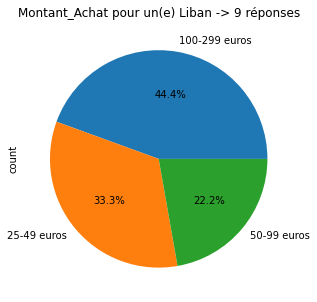

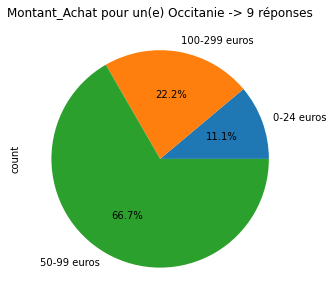

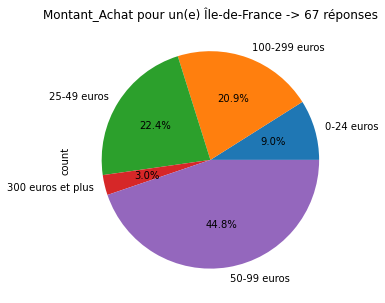

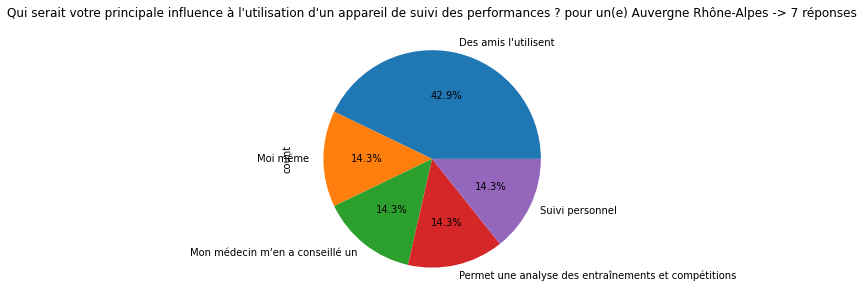

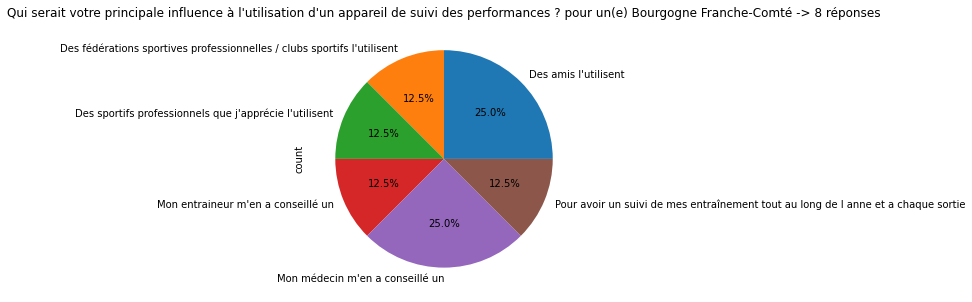

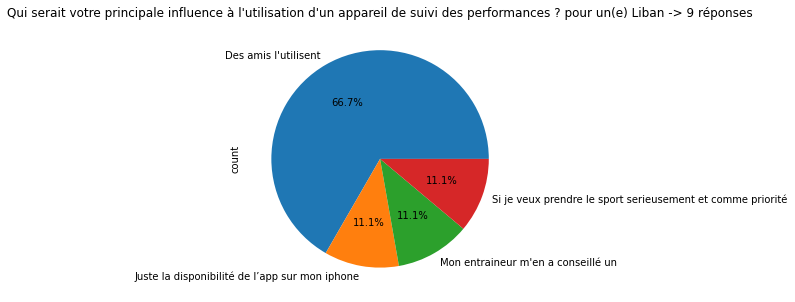

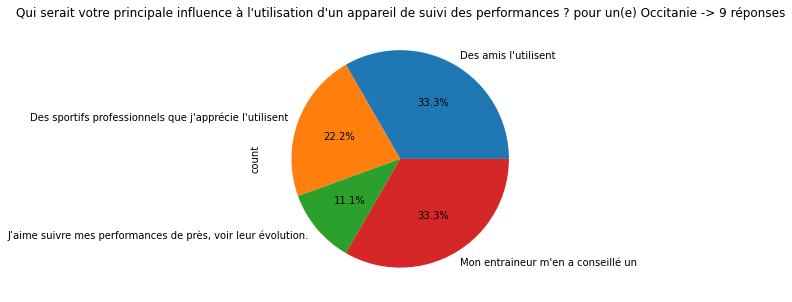

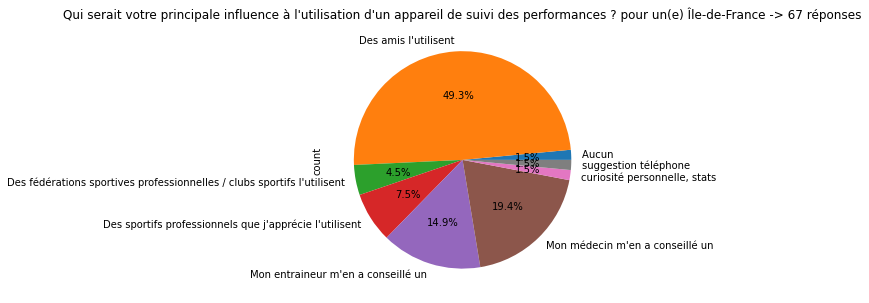

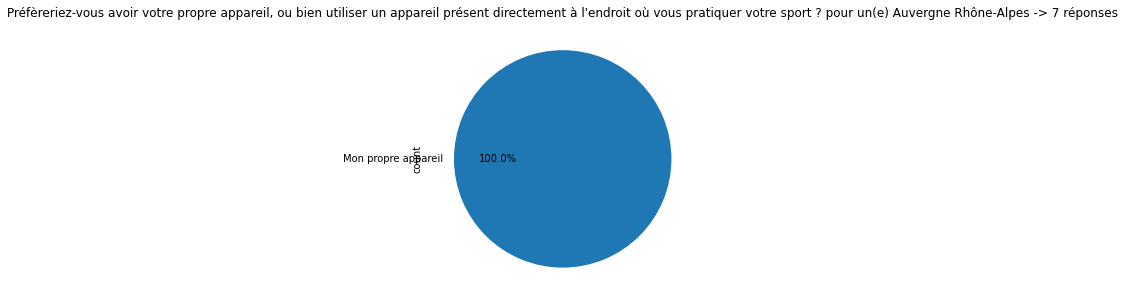

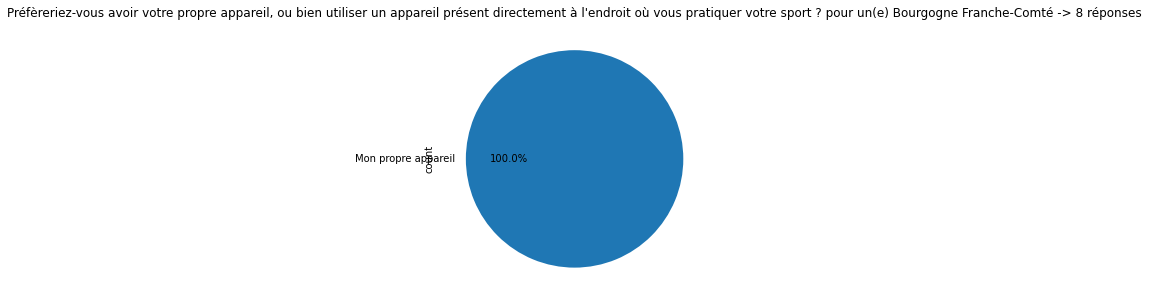

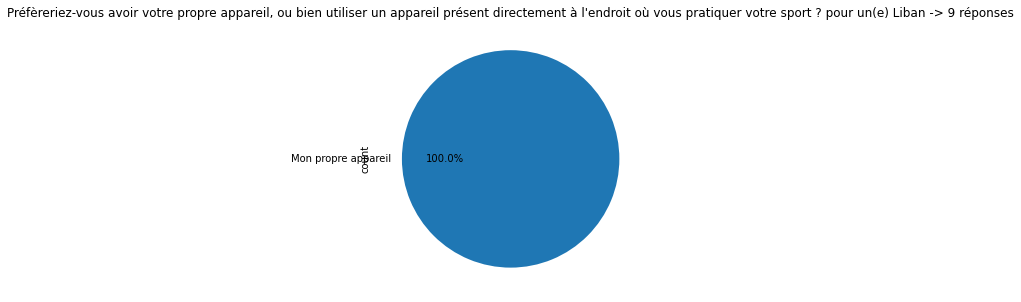

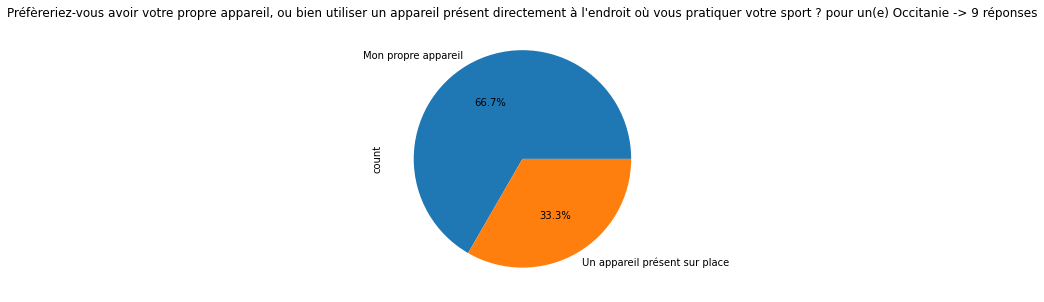

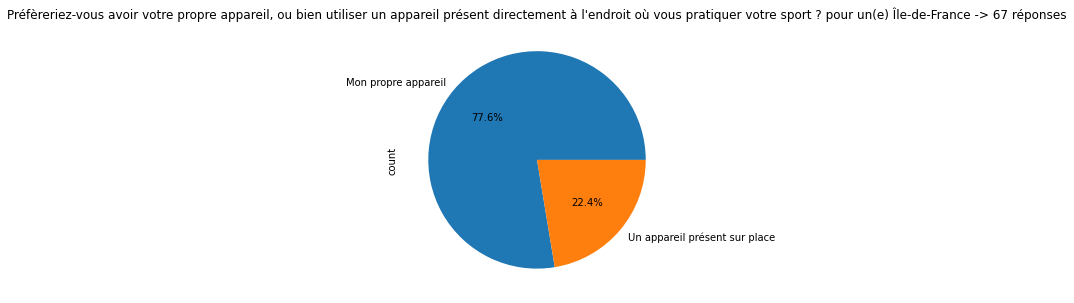

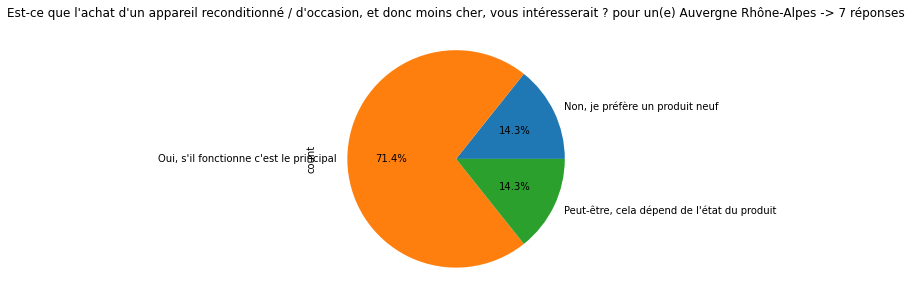

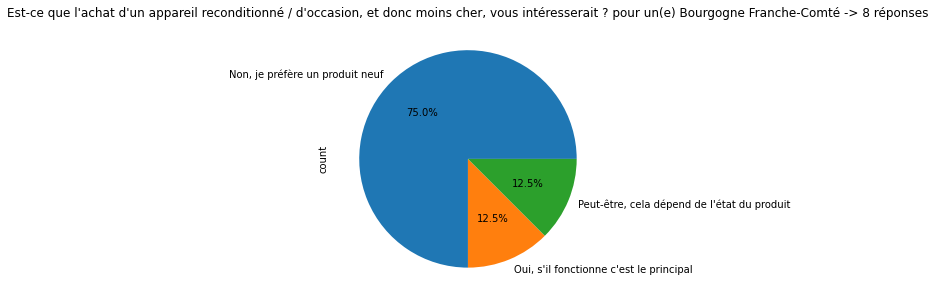

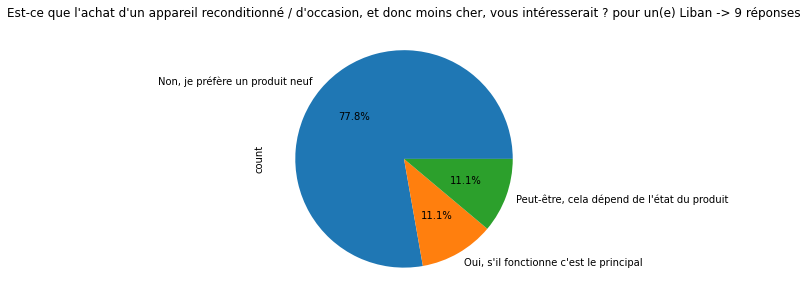

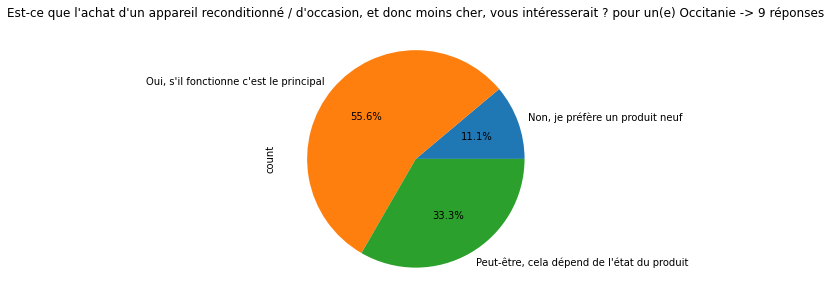

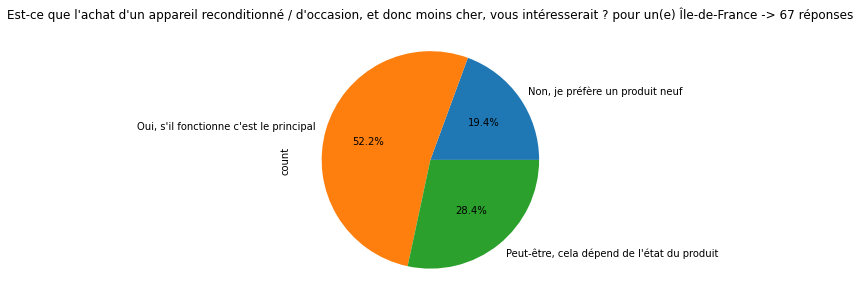

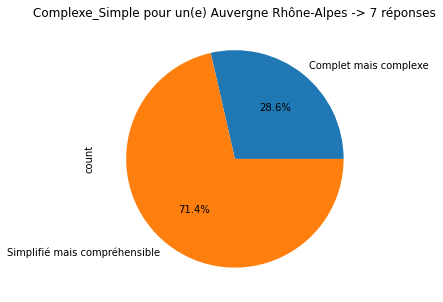

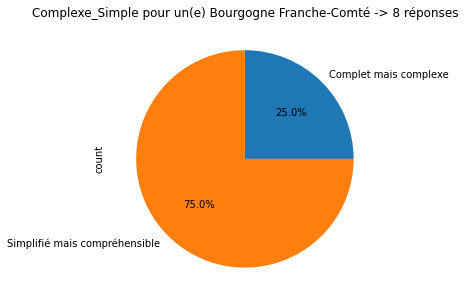

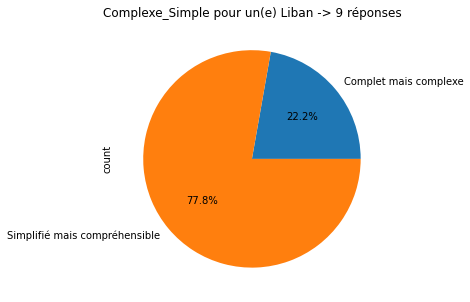

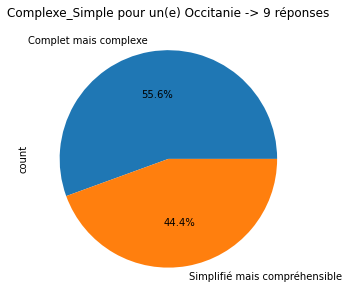

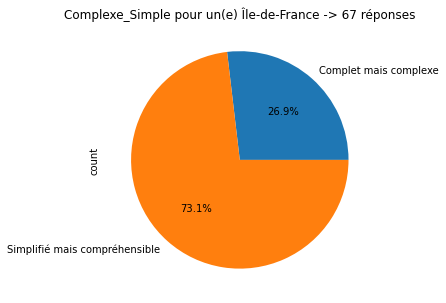

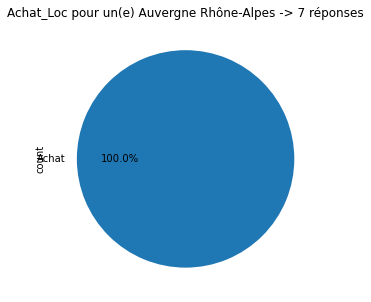

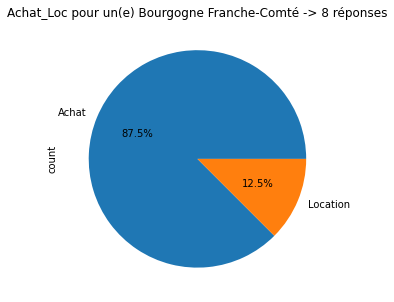

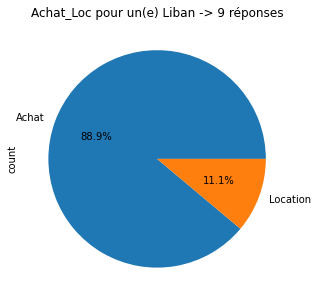

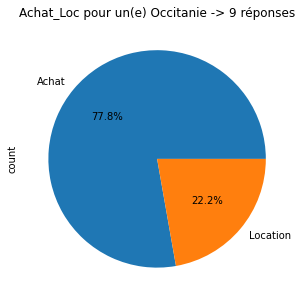

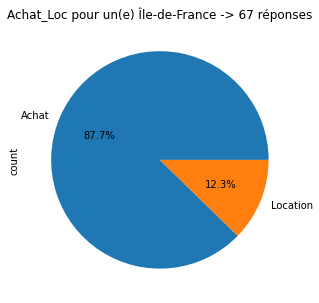

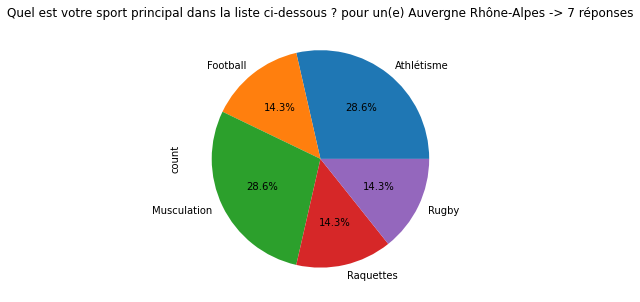

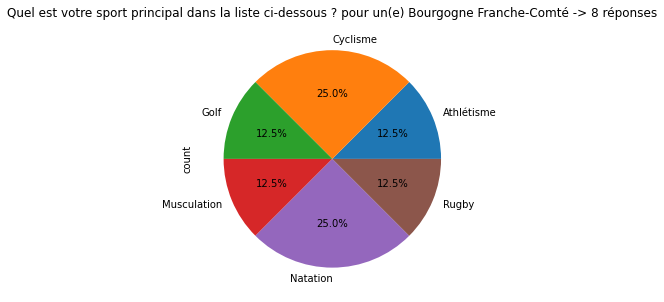

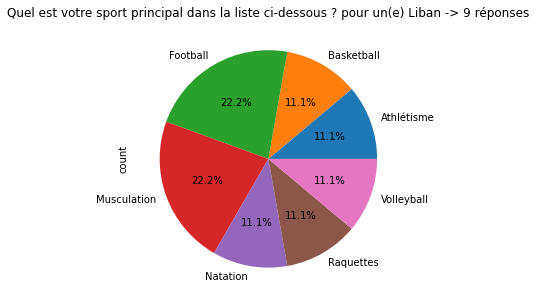

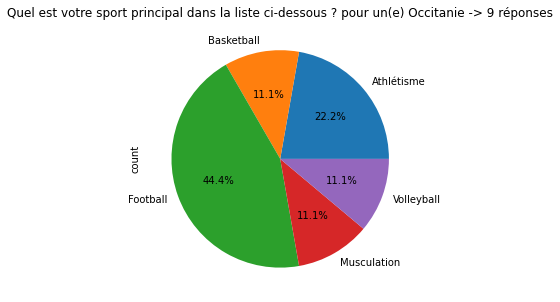

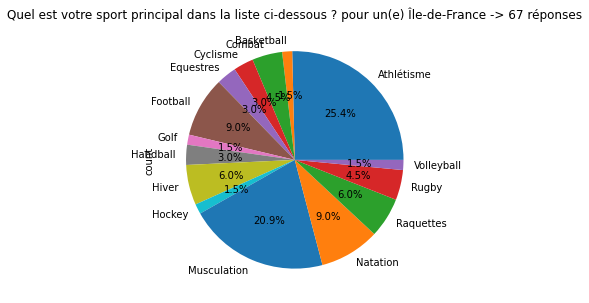

In [47]:
lieux = {}
for i in range (len(result)):
    tempLieu = result["Quelle est votre principale région de résidence ?"].iloc[i]
    if(tempLieu not in lieux):
        lieux[tempLieu] = 1
    else:
        lieux[tempLieu]+=1

lieuDict ={}
for curLieu in lieux.keys():
    lieuDict[curLieu] = result[result["Quelle est votre principale région de résidence ?"]==curLieu]
    lieuDict[curLieu].dropna(axis=1,inplace=True,how='all')
    renameCol(lieuDict[curLieu])
    lieuDict[curLieu].sort_index(axis=1, ascending=False,inplace=True)
    print(f"Il y a eu {len(lieuDict[curLieu])} réponses pour le lieu {curLieu}")
    
lieuDict = dict(sorted(lieuDict.items()))

delList=[]
minNb = 6
for k in lieuDict.keys():
    if(len(lieuDict[k])<=minNb):delList.append(k)
      
print("Suppression des données de moins de",minNb)
for i in delList:
    #print("Suppression de :",i)
    del lieuDict[i]
    
#Graph
for stat in statNames:
    for k in lieuDict.keys():
        lieuDict[k].groupby(by=stat).count().plot(kind='pie',y='count',figsize=(5,5),title=f"{stat} pour un(e) {k} -> {len(lieuDict[k])} réponses",autopct='%1.1f%%',legend=False)

### Analyse par catégorie socio-professionnelle ?

Il y a eu 48 réponses pour le lieu Etudiant
Il y a eu 8 réponses pour le lieu Retraité
Il y a eu 24 réponses pour le lieu Employé
Il y a eu 8 réponses pour le lieu Enseignant
Il y a eu 26 réponses pour le lieu Cadre
Il y a eu 2 réponses pour le lieu Militaire
Il y a eu 2 réponses pour le lieu Parent au foyer
Il y a eu 3 réponses pour le lieu Demandeur d'emploi
Il y a eu 2 réponses pour le lieu Artisan / Commerçant
Il y a eu 1 réponses pour le lieu Saisonnier
Il y a eu 2 réponses pour le lieu Profession intérimaire
Il y a eu 1 réponses pour le lieu Architecte d'interieur
Il y a eu 1 réponses pour le lieu Agriculteur
Il y a eu 1 réponses pour le lieu Chef d'entreprise
Suppression des données de moins de 5


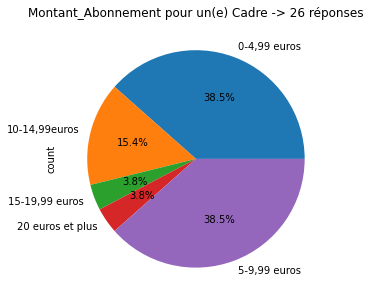

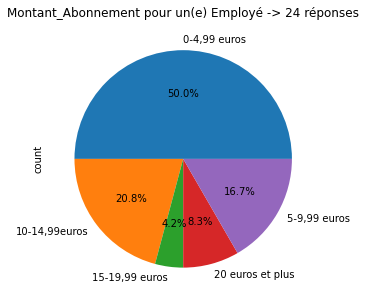

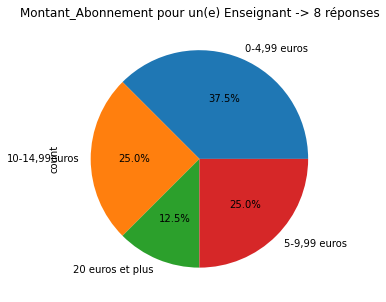

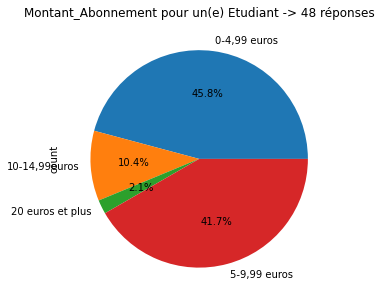

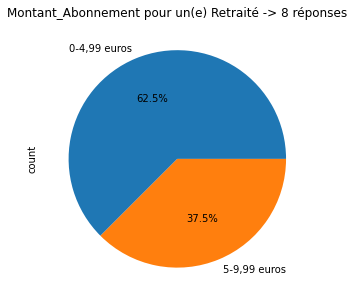

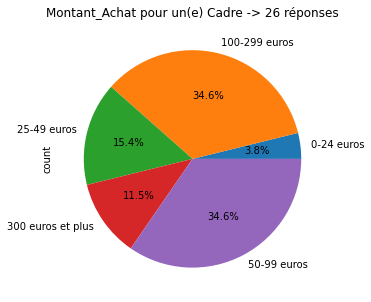

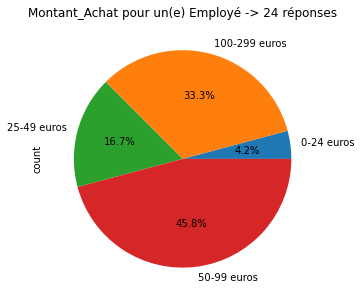

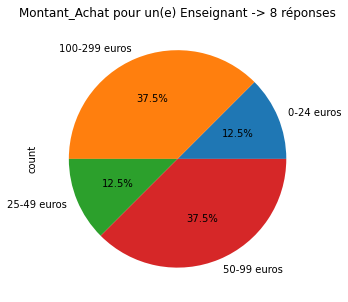

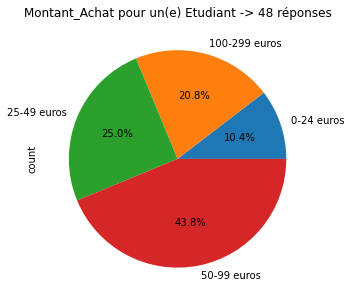

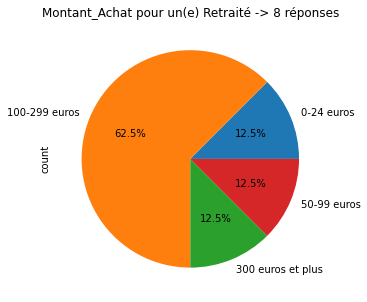

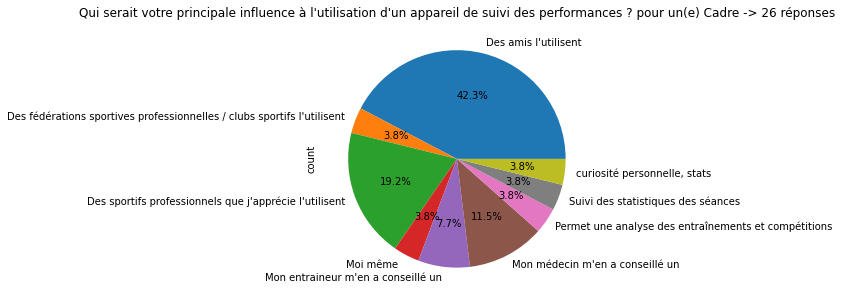

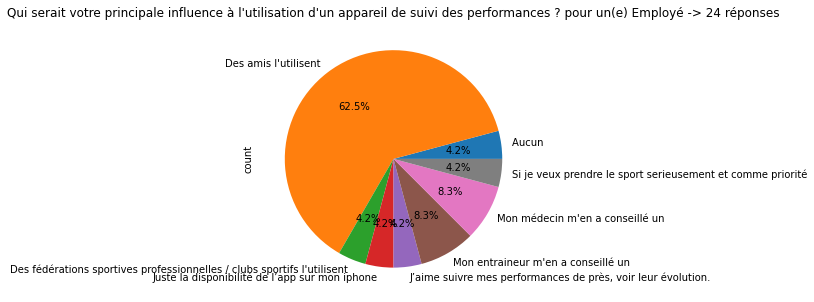

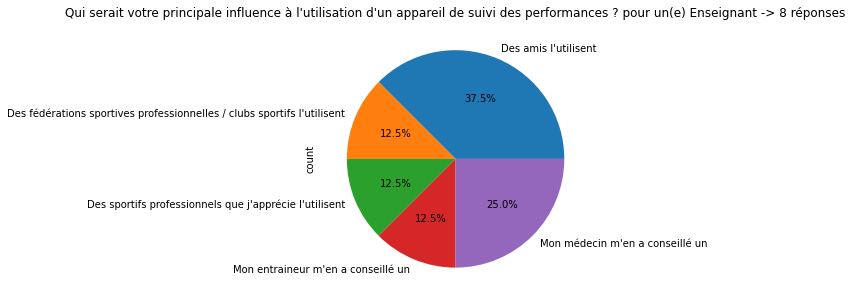

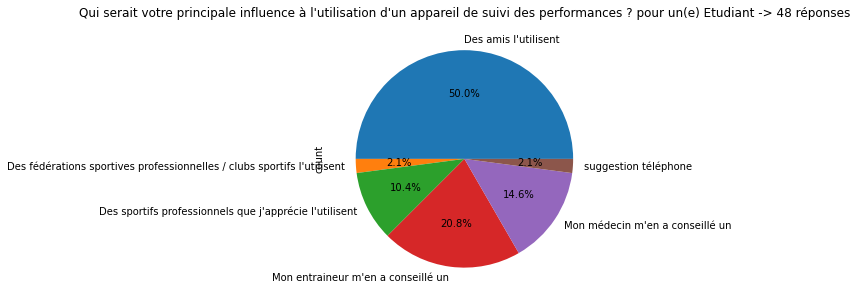

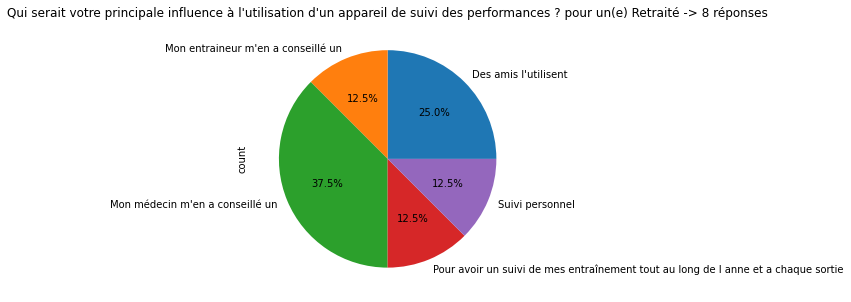

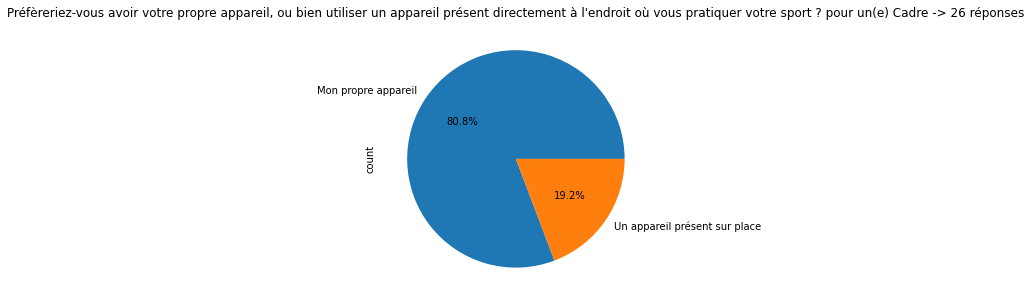

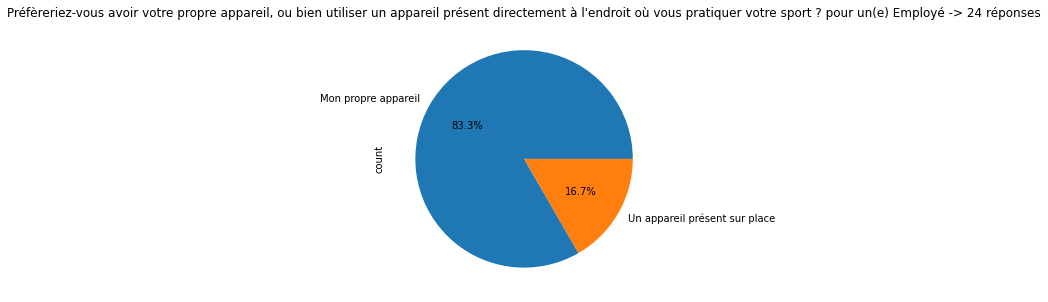

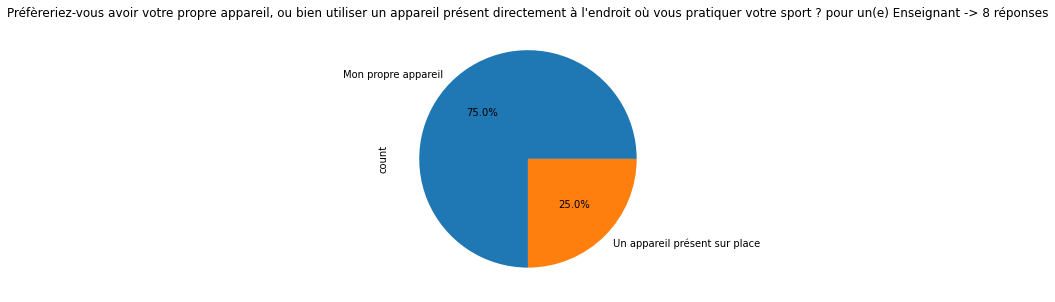

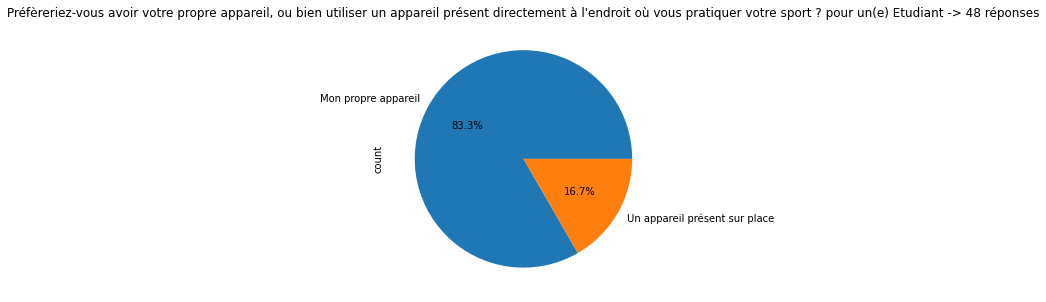

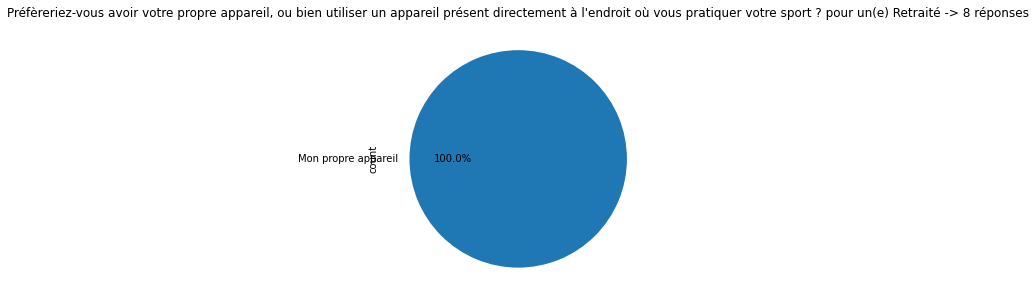

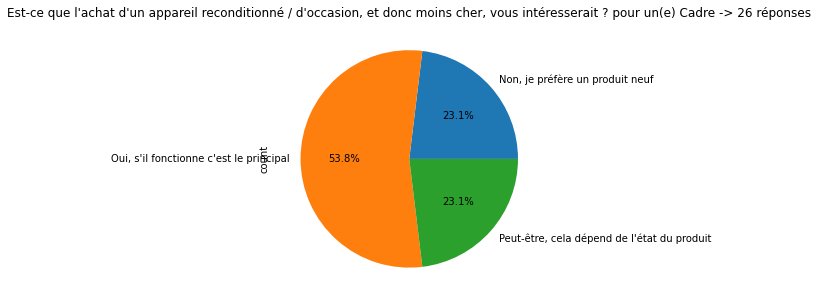

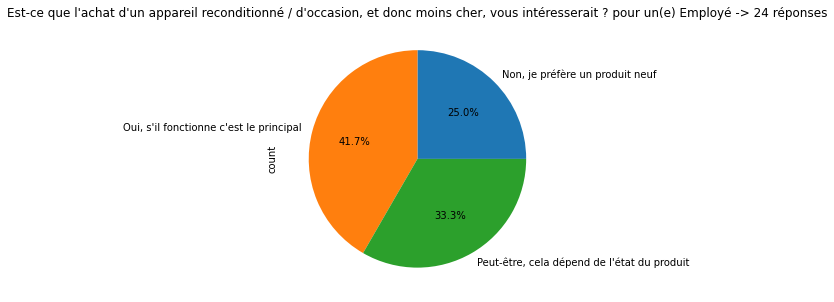

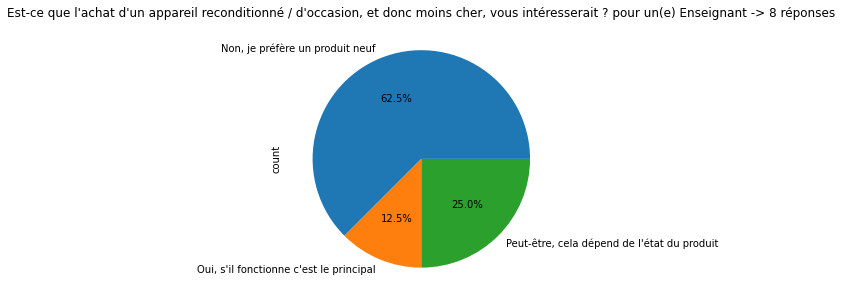

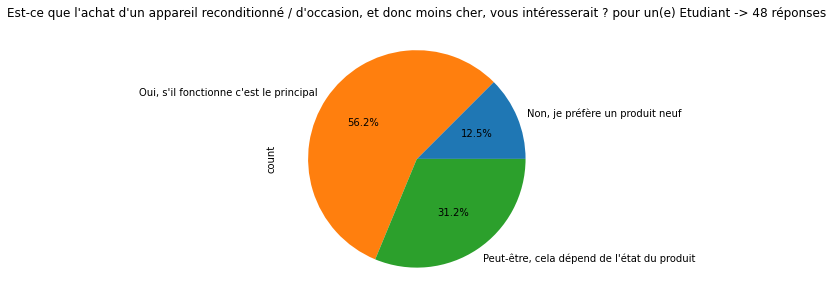

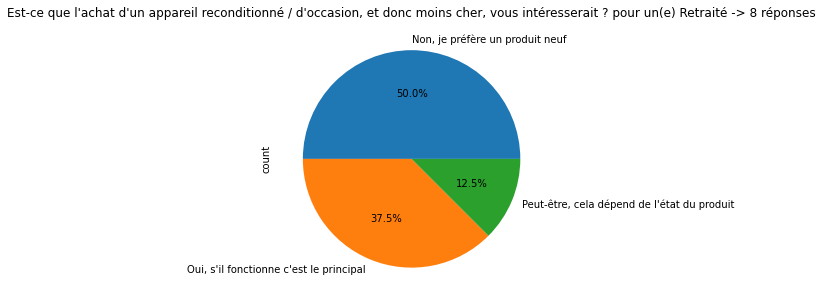

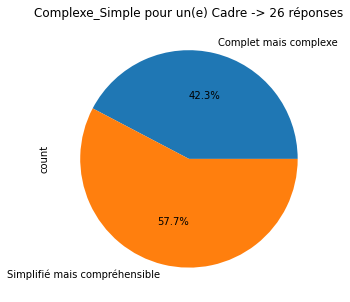

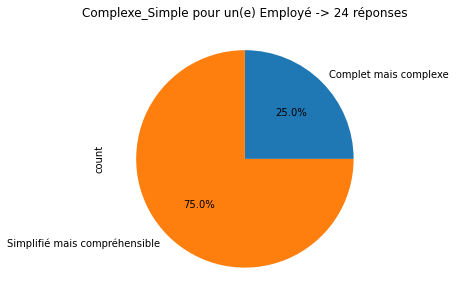

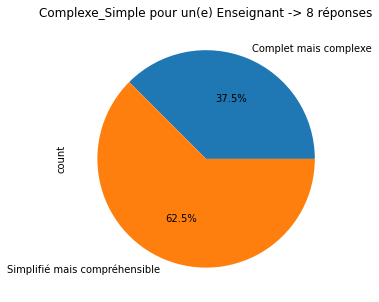

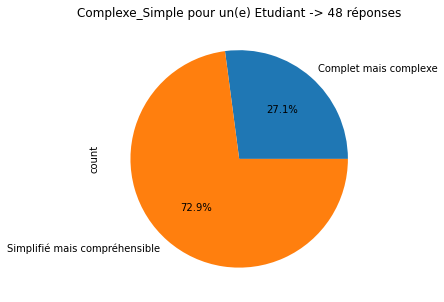

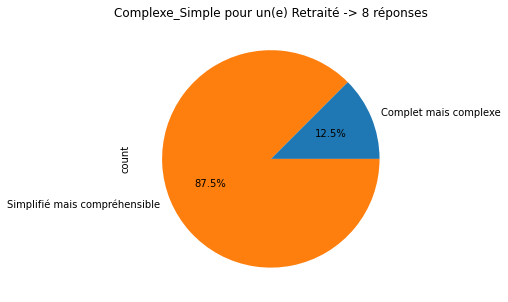

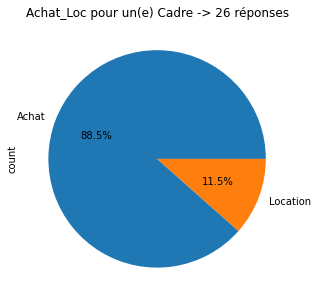

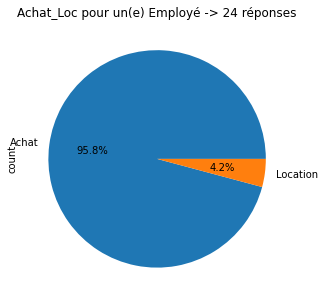

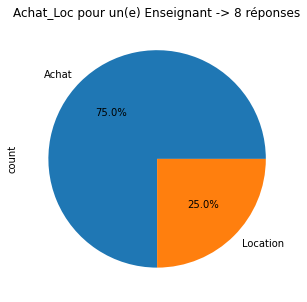

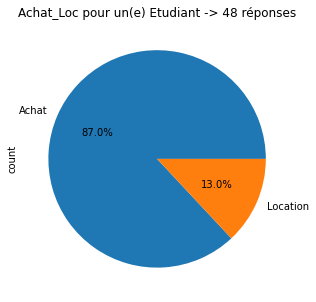

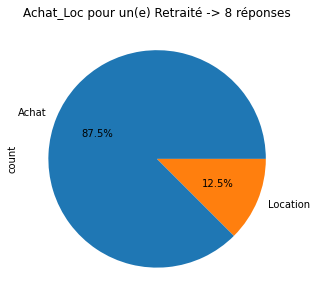

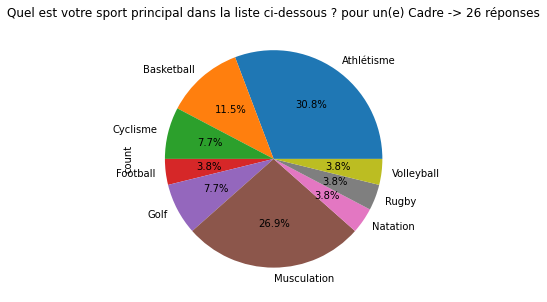

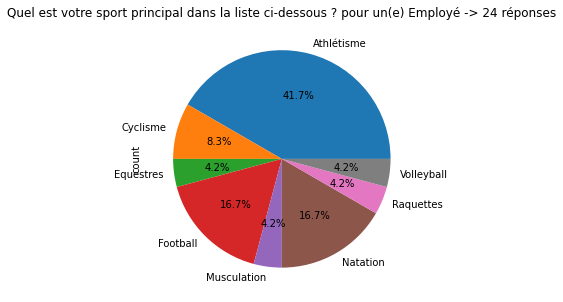

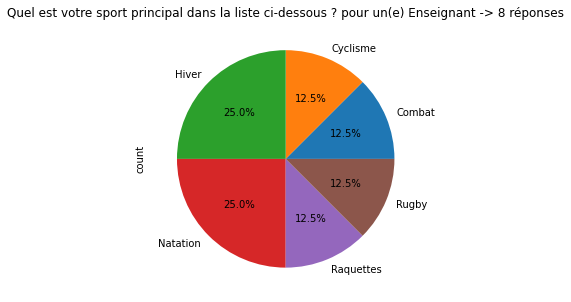

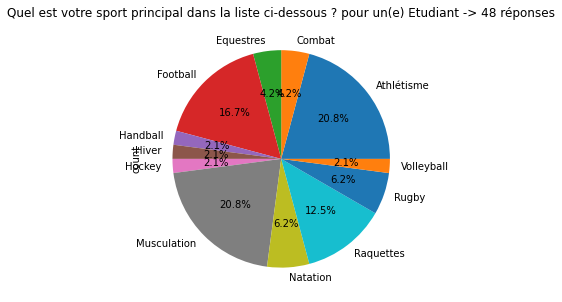

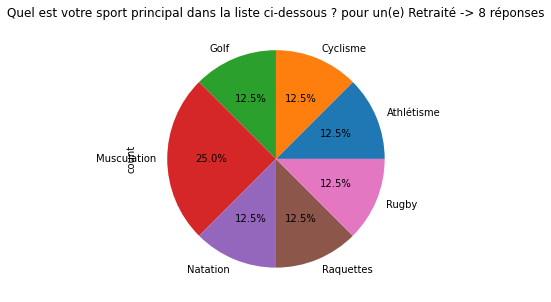

In [48]:
cats = {}
for i in range (len(result)):
    tempCat = result["Quelle est votre catégorie socio-professionnelle ?"].iloc[i]
    if(tempCat not in cats):
        cats[tempCat] = 1
    else:
        cats[tempCat]+=1

catDict ={}
for curCat in cats.keys():
    catDict[curCat] = result[result["Quelle est votre catégorie socio-professionnelle ?"]==curCat]
    catDict[curCat].dropna(axis=1,inplace=True,how='all')
    renameCol(catDict[curCat])
    catDict[curCat].sort_index(axis=1, ascending=False,inplace=True)
    print(f"Il y a eu {len(catDict[curCat])} réponses pour le lieu {curCat}")
    
catDict = dict(sorted(catDict.items()))

delList=[]
minNb = 5
for k in catDict.keys():
    if(len(catDict[k])<=minNb):delList.append(k)
      
print("Suppression des données de moins de",minNb)
for i in delList:
    #print("Suppression de :",i)
    del catDict[i]
    
#Graph
for stat in statNames:
    for k in catDict.keys():
        catDict[k].groupby(by=stat).count().plot(kind='pie',y='count',figsize=(5,5),title=f"{stat} pour un(e) {k} -> {len(catDict[k])} réponses",autopct='%1.1f%%',legend=False)

### Analyse par fréquence

Il y a eu 78 réponses pour le lieu Régulièrement chaque semaine
Il y a eu 22 réponses pour le lieu Régulièrement chaque mois
Il y a eu 16 réponses pour le lieu Occasionnellement
Il y a eu 13 réponses pour le lieu Plutôt rarement
Suppression des données de moins de 5


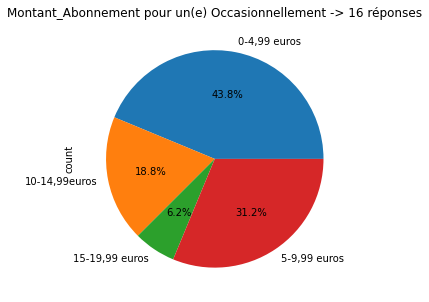

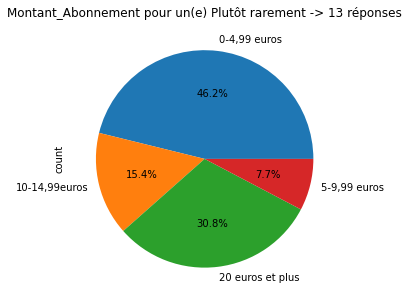

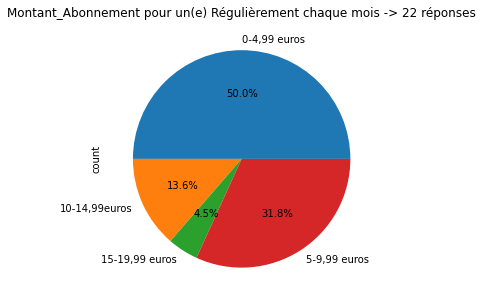

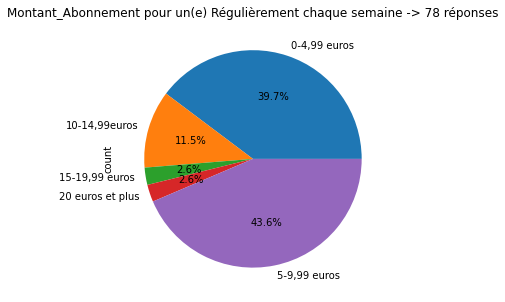

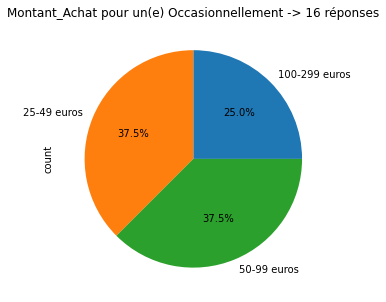

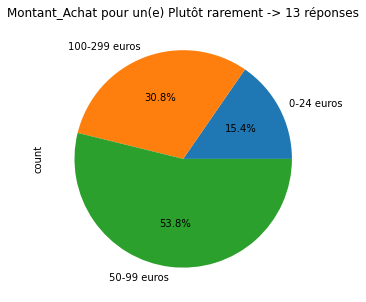

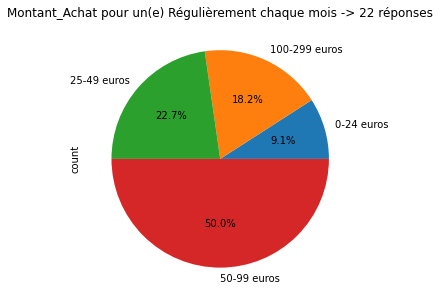

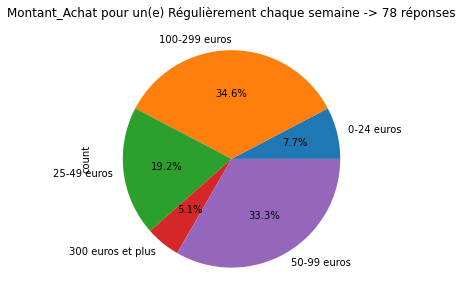

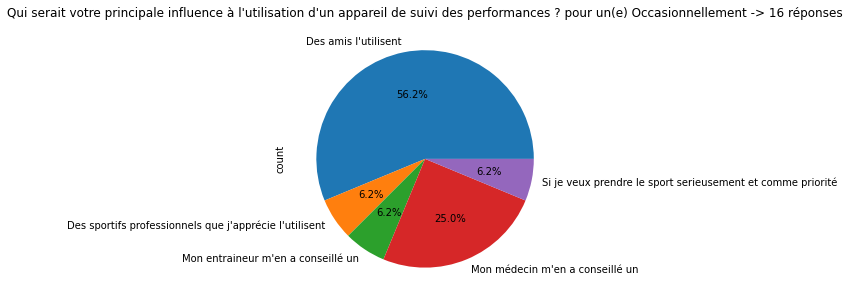

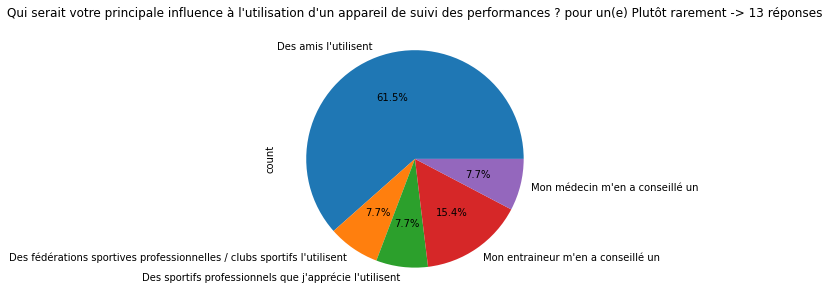

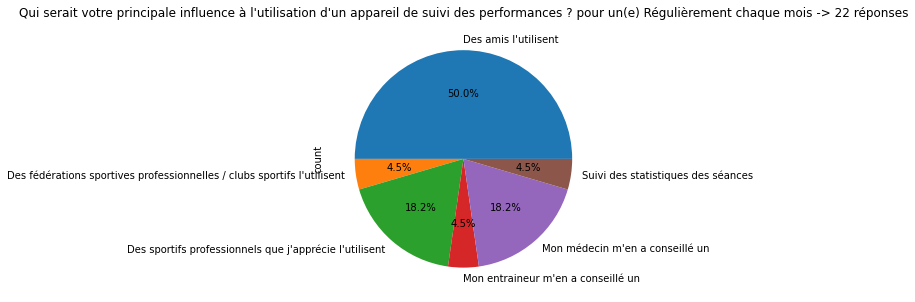

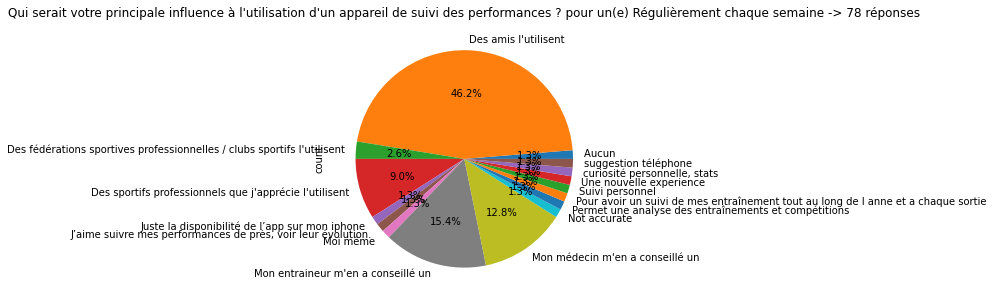

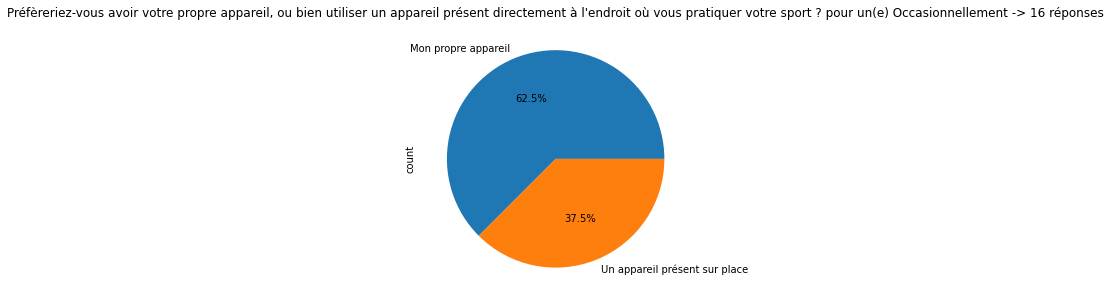

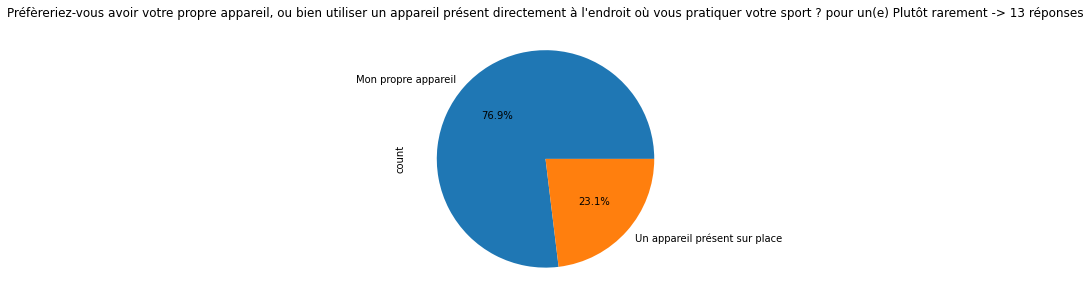

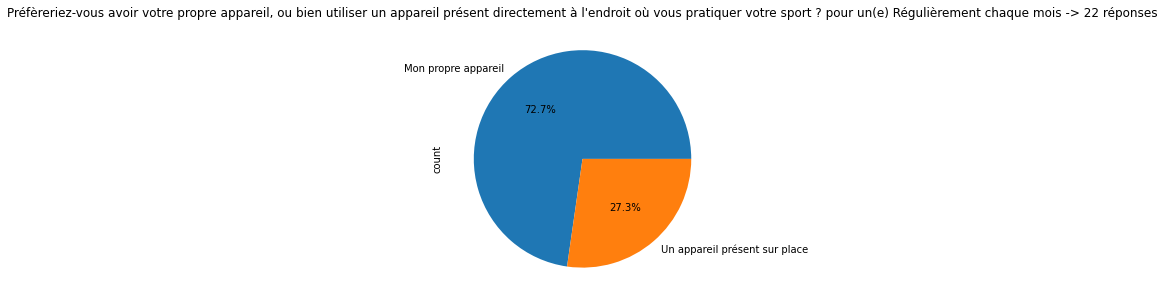

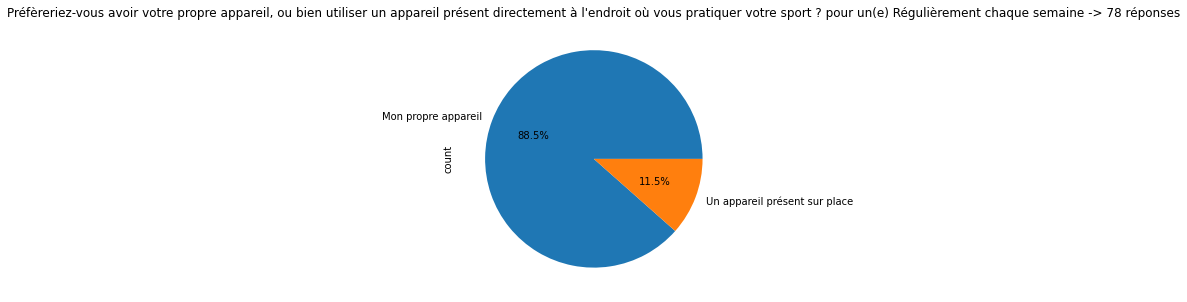

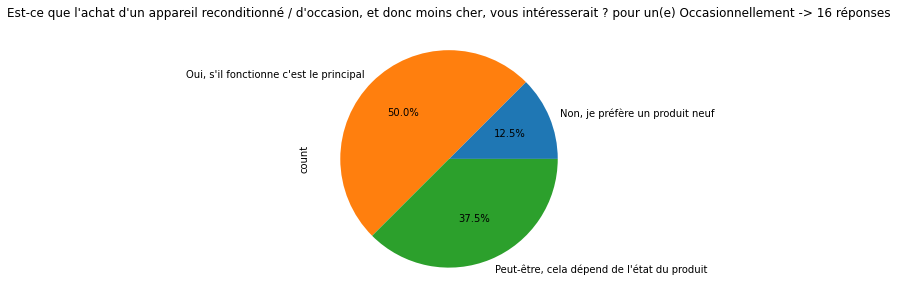

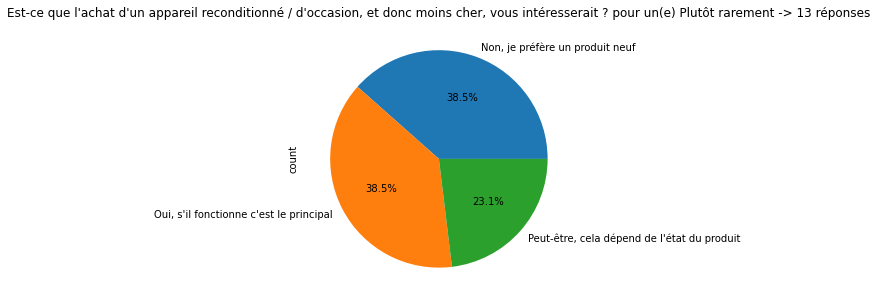

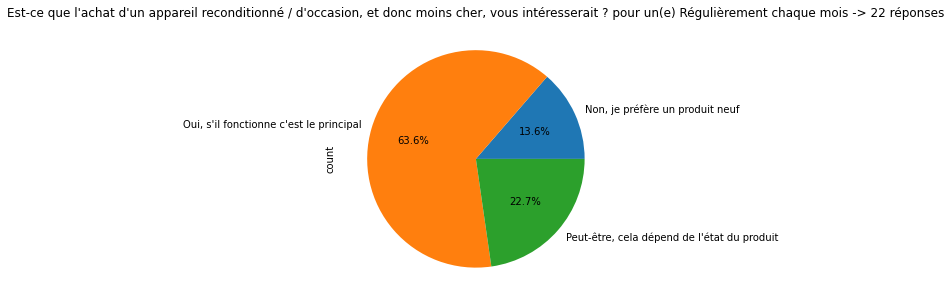

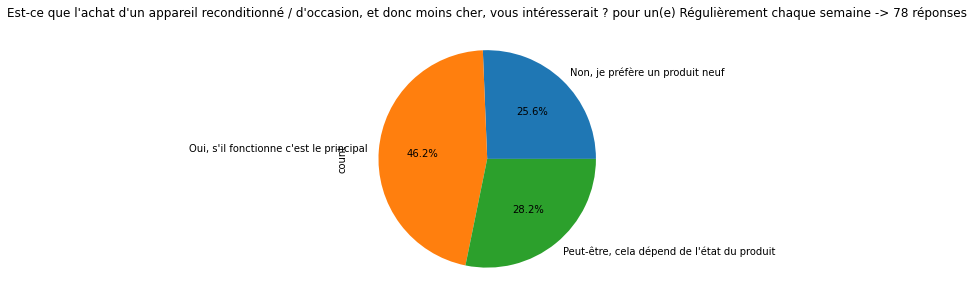

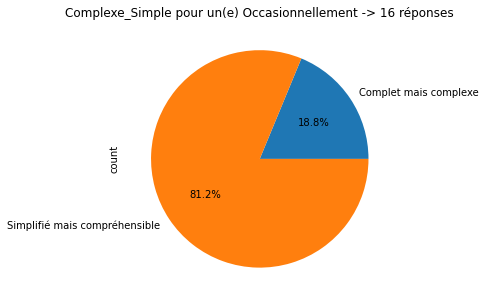

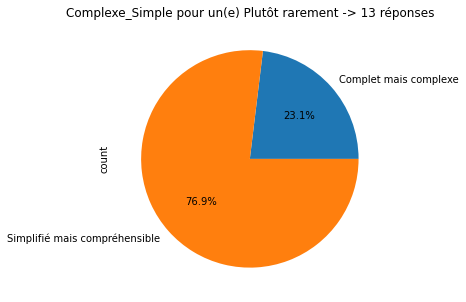

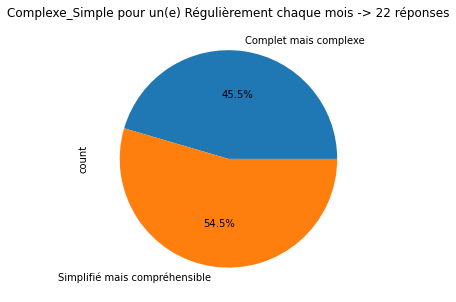

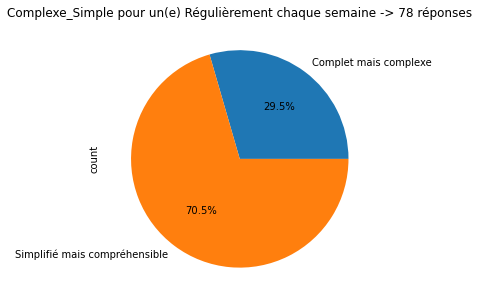

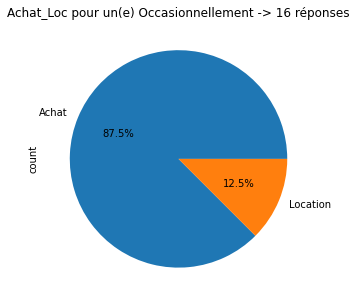

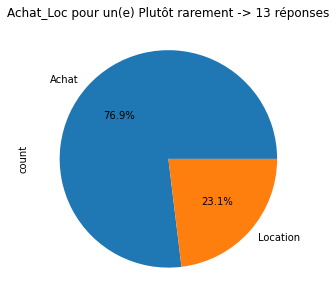

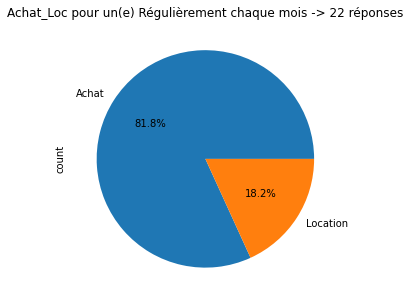

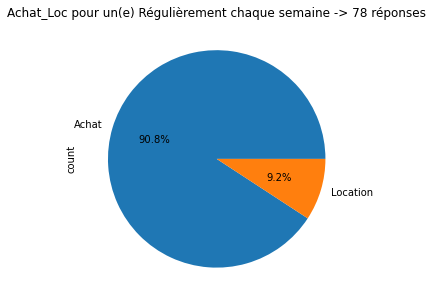

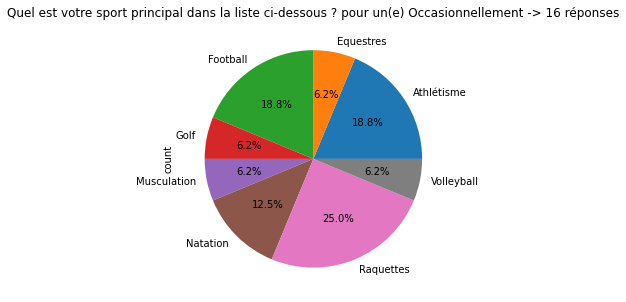

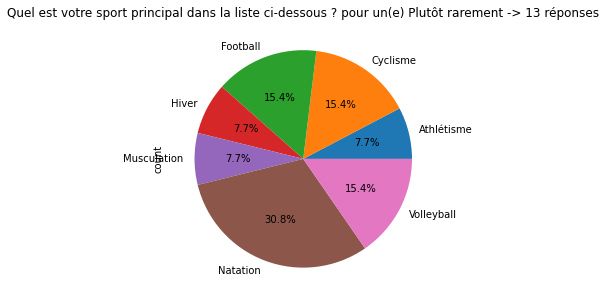

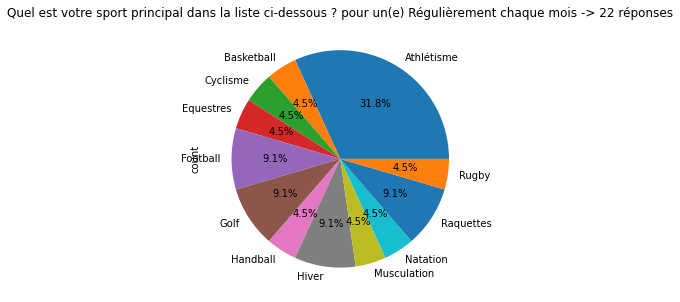

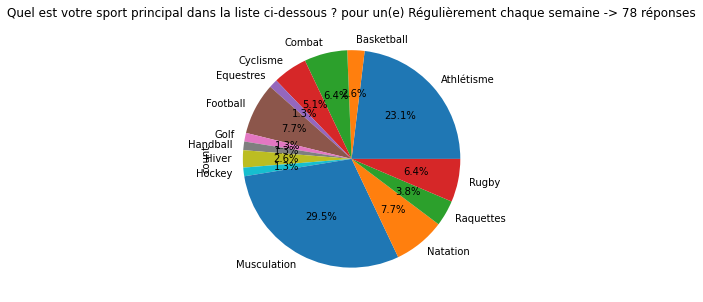

In [49]:
freq = {}
for i in range (len(result)):
    tempCat = result["À quelle fréquence pratiquez-vous une activité sportive ?"].iloc[i]
    if(tempCat not in freq):
        freq[tempCat] = 1
    else:
        freq[tempCat]+=1

freqDict ={}
for curFreq in freq.keys():
    freqDict[curFreq] = result[result["À quelle fréquence pratiquez-vous une activité sportive ?"]==curFreq]
    freqDict[curFreq].dropna(axis=1,inplace=True,how='all')
    renameCol(freqDict[curFreq])
    freqDict[curFreq].sort_index(axis=1, ascending=False,inplace=True)
    print(f"Il y a eu {len(freqDict[curFreq])} réponses pour le lieu {curFreq}")
    
freqDict = dict(sorted(freqDict.items()))

delList=[]
minNb = 5
for k in freqDict.keys():
    if(len(freqDict[k])<=minNb):delList.append(k)
      
print("Suppression des données de moins de",minNb)
for i in delList:
    #print("Suppression de :",i)
    del freqDict[i]
    
#Graph
for stat in statNames:
    for k in freqDict.keys():
        freqDict[k].groupby(by=stat).count().plot(kind='pie',y='count',figsize=(5,5),title=f"{stat} pour un(e) {k} -> {len(freqDict[k])} réponses",autopct='%1.1f%%',legend=False)

### HeatMap

In [50]:
def renameColHeat(df):
    cols = {}
    for i in df.columns:
        if('fréquence' in i):
            cols[i]='Fréquence'
        elif ("influence" in i):
            cols[i]='Influence'
        elif ("âge" in i):
            cols[i]='Age'
        elif ("résidence" in i):
            cols[i]='Lieu'
        elif ("catégorie" in i):
            cols[i]='Catégorie'
        elif ("sport principal" in i):
            cols[i]='Sport Principal'
        elif ("secteur" in i):
            cols[i]='Secteur'
        elif ("genre" in i):
            cols[i]='Genre'
        elif ("propre appareil" in i):
            cols[i]='Possession'
        elif ("compétition" in i):
            cols[i]='Compétition'
        elif ("club sportif" in i):
            cols[i]='Club'
        elif ("utilisez-vous un appareil" in i):
            cols[i]='Utilisation'
        elif ("appareil reconditionné" in i):
            cols[i]='Reconditionné'
    df.rename(columns=cols,inplace=True) 
    return df

In [51]:
heatMapColDrop = ["count","Si non pour quelles raisons ?","Raisons","Si oui quel(s) appareil(s) utilisez-vous ?","Appareils_Utiles"]
resultHeatMap = result.drop(heatMapColDrop,axis=1)
resultHeatMap = renameColHeat(resultHeatMap)
resultHeatMap['Achat_Loc'] = resultHeatMap['Achat_Loc'].map(nanAchat_Loc)
resultHeatMap

Fréquence  \
0    Régulièrement chaque semaine   
1    Régulièrement chaque semaine   
6       Régulièrement chaque mois   
27   Régulièrement chaque semaine   
29              Occasionnellement   
..                            ...   
109     Régulièrement chaque mois   
111     Régulièrement chaque mois   
112             Occasionnellement   
124     Régulièrement chaque mois   
125  Régulièrement chaque semaine   

                                             Influence        Age  \
0                   Mon entraineur m'en a conseillé un  15-17 ans   
1                   Mon entraineur m'en a conseillé un  18-24 ans   
6    Des sportifs professionnels que j'apprécie l'u...  18-24 ans   
27                                Des amis l'utilisent  18-24 ans   
29                     Mon médecin m'en a conseillé un  18-24 ans   
..                                                 ...        ...   
109  Des sportifs professionnels que j'apprécie l'u...  18-24 ans   
111  Des sportifs professionnels que j'apprécie l'u...  35-44 ans   
112                    Mon médecin m'en a conseillé un  25-34 ans   
124                               Des amis l'utilisent  15-17 ans   
125  Des fédérations sportives professionnelles / c...  15-17 ans   

                Lieu          Catégorie Sport Principal  \
0      Île-de-France           Etudiant          Hockey   
1      Île-de-France           Etudiant       Raquettes   
6      Île-de-France           Etudiant       Raquettes   
27         Normandie           Etudiant       Raquettes   
29     Île-de-France           Etudiant       Raquettes   
..               ...                ...             ...   
109    Île-de-France              Cadre            Golf   
111  Hauts-de-France  Chef d'entreprise            Golf   
112         Bretagne            Employé       Equestres   
124    Île-de-France           Etudiant       Equestres   
125    Île-de-France           Etudiant       Equestres   

                       Secteur  Genre                     Possession  \
0                    Education  Homme            Mon propre appareil   
1      Informatique  / Télécom  Homme            Mon propre appareil   
6                    Industrie  Homme            Mon propre appareil   
27             Agroalimentaire  Homme            Mon propre appareil   
29   Communication / Marketing  Femme            Mon propre appareil   
..                         ...    ...                            ...   
109                    Energie  Homme            Mon propre appareil   
111                      Droit  Femme  Un appareil présent sur place   
112        Ressources humaines  Femme            Mon propre appareil   
124       Physique / Mécanique  Femme            Mon propre appareil   
125                  Transport  Homme  Un appareil présent sur place   

    Compétition  ... Obstacle_Prix  Obstacle_Mauv_Utilisation  \
0           Oui  ...           5.0                        3.0   
1           Non  ...           5.0                        2.0   
6           Non  ...           5.0                        1.0   
27          Non  ...           5.0                        2.0   
29          Non  ...           4.0                        3.0   
..          ...  ...           ...                        ...   
109         Non  ...           2.0                        3.0   
111         Non  ...           4.0                        2.0   
112         Non  ...           4.0                        5.0   
124         Non  ...           4.0                        3.0   
125         Oui  ...           5.0                        2.0   

     Obstacle_Inutile  Obstacle_Inconfort  Montant_Achat  Montant_Abonnement  \
0                 2.0                 2.0     0-24 euros        0-4,99 euros   
1                 2.0                 4.0    25-49 euros        0-4,99 euros   
6                 1.0                 1.0    50-99 euros        0-4,99 euros   
27                3.0                 2.0    50-99 euros        0-4,99 euro

In [52]:
def classToInt(x):
    return x

for col in resultHeatMap.columns:
    tempDict = {}
    count=0
    for i in range (len(resultHeatMap)):
        cur = resultHeatMap[col].iloc[i]
        if cur in tempDict.keys():
            resultHeatMap[col].iloc[i] = tempDict[cur]
        else:
            tempDict[cur] = count
            count+=1
            resultHeatMap[col].iloc[i] = tempDict[cur]
resultHeatMap

Fréquence Influence Age Lieu Catégorie Sport Principal Secteur Genre  \
0           0         0   0    0         0               0       0     0   
1           0         0   1    0         0               1       1     0   
6           1         1   1    0         0               1       2     0   
27          0         2   1    1         0               1       3     0   
29          2         3   1    0         0               1       4     1   
..        ...       ...  ..  ...       ...             ...     ...   ...   
109         1         1   1    0         4              13       6     0   
111         1         1   5    9        13              13      13     1   
112         2         3   4    7         2              14      19     1   
124         1         2   0    0         0              14       9     1   
125         0        13   0    0         0              14       5     0   

    Possession Compétition  ... Obstacle_Prix  Obstacle_Mauv_Utilisation  \
0            0           0  ...           0.0                        0.0   
1            0           1  ...           0.0                        1.0   
6            0           1  ...           0.0                        2.0   
27           0           1  ...           0.0                        1.0   
29           0           1  ...           1.0                        0.0   
..         ...         ...  ...           ...                        ...   
109          0           1  ...           3.0                        0.0   
111          1           1  ...           1.0                        1.0   
112          0           1  ...           1.0                        4.0   
124          0           1  ...           1.0                        0.0   
125          1           0  ...           0.0                        1.0   

     Obstacle_Inutile  Obstacle_Inconfort  Montant_Achat  Montant_Abonnement  \
0                 0.0                 0.0              0                   0   
1                 0.0                 1.0              1                   0   
6                 1.0                 2.0              2                   0   
27                2.0                 0.0              2                   0   
29                2.0                 0.0              2                   0   
..                ...                 ...            ...                 ...   
109               0.0                 0.0              2                   2   
111               3.0                 3.0              2                   3   
112               0.0                 0.0              2                   3   
124               3.0                 3.0              1                   2   
125               0.0                 3.0              0                   2   

     Utilisation Reconditionné Complexe_Simple Achat_Loc  
0              0             0               0         0  
1              0             0               0         0  
6              0             1               0         0  
27             1             1               1         0  
29             0             1               1         0  
..           ...           ...             ...       ...  
109            0             1               0         0  
111            0             1               0         0  
112            0             0               0         0  
124            0             1               0         0  
125            0             1               0         1  

[129 rows x 23 columns]

In [53]:
cor=resultHeatMap.corr("pearson") #Correlation of the variables between them
cor

Fréquence  Influence       Age      Lieu  \
Fréquence                   1.000000  -0.101220  0.177353  0.084492   
Influence                  -0.101220   1.000000  0.184054  0.121942   
Age                         0.177353   0.184054  1.000000  0.216223   
Lieu                        0.084492   0.121942  0.216223  1.000000   
Catégorie                   0.052230   0.143438  0.552841  0.231103   
Sport Principal             0.099060   0.072427  0.245979  0.174508   
Secteur                    -0.080584  -0.046455  0.165295  0.143829   
Genre                       0.186121  -0.014121  0.084058  0.055972   
Possession                  0.188177  -0.076634  0.115087 -0.020923   
Compétition                 0.221064   0.002186  0.259480  0.038549   
Club                        0.417611  -0.190444  0.115833  0.061499   
Obstacle_Visuel            -0.083104  -0.109921 -0.169994 -0.033345   
Obstacle_Qualite           -0.040325  -0.028164  0.107628  0.003747   
Obstacle_Prix               0.160367   0.109344  0.094853  0.128162   
Obstacle_Mauv_Utilisation   0.018642  -0.081297  0.099558 -0.026976   
Obstacle_Inutile           -0.126458   0.022999  0.082517  0.026113   
Obstacle_Inconfort         -0.081198   0.133343  0.070576  0.080605   
Montant_Achat              -0.075794   0.027543  0.204884  0.059751   
Montant_Abonnement          0.066913  -0.024362  0.011601  0.121263   
Utilisation                -0.218548   0.318336  0.141833  0.055037   
Reconditionné               0.003444   0.269985  0.089074  0.045345   
Complexe_Simple             0.051237  -0.076842 -0.031354 -0.026855   
Achat_Loc                   0.105908  -0.043319 -0.033551  0.028638   

                           Catégorie  Sport Principal   Secteur     Genre  \
Fréquence                   0.052230         0.099060 -0.080584  0.186121   
Influence                   0.143438         0.072427 -0.046455 -0.014121   
Age                         0.552841         0.245979  0.165295  0.084058   
Lieu                        0.231103         0.174508  0.143829  0.055972   
Catégorie                   1.000000         0.237357  0.229350  0.054140   
Sport Principal             0.237357         1.000000  0.179666  0.022005   
Secteur                     0.229350         0.179666  1.000000  0.029989   
Genre                       0.054140         0.022005  0.029989  1.000000   
Possession                  0.179545         0.204276  0.085630  0.099562   
Compétition                 0.155691         0.043578 -0.011086  0.188209   
Club                        0.060621         0.127737  0.019254  0.177019   
Obstacle_Visuel            -0.101597        -0.017619  0.052077  0.067751   
Obstacle_Qualite            0.171462         0.009984  0.048888  0.062096   
Obstacle_Prix               0.097933         0.202928 -0.000028  0.019335   
Obstacle_Mauv_Utilisation   0.060585        -0.085957  0.009675 -0.066433   
Obstacle_Inutile            0.120353         0.019184  0.030752  0.023608   
Obstacle_Inconfort          0.085762         0.031861  0.086446 -0.066719   
Montant_Achat               0.022236        -0.052430  0.232580 -0.213364   
Montant_Abonnement          0.111009         0.295270  0.224299 -0.005724   
Utilisation                -0.036128        -0.086180  0.099395 -0.105475   
Reconditionné               0.088486         0.051545  0.051635  0.121089   
Complexe_Simple            -0.122479        -0.149784 -0.011673  0.246594   
Achat_Loc                   0.045253         0.141929  0.161096 -0.029370   

                           Possession  Compétition  ...  Obstacle_Prix  \
Fréquence                    0.188177     0.221064  ...       0.160367   
Influence                   -0.076634     0.002186  ...       0.109344   
Age                          0.115087     0.259480  ...       0.094853   
Lieu                        -0.020923     0.038549  ...       0.128162   
Catégorie                    0.179545     0.155691  ...       0.097933   
Sport Principal              

In [54]:
c = resultHeatMap.corr("pearson").abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so = so[so!=1]
so.tail(16)

Montant_Abonnement         Sport Principal              0.295270
Sport Principal            Montant_Abonnement           0.295270
Obstacle_Mauv_Utilisation  Obstacle_Inutile             0.299003
Obstacle_Inutile           Obstacle_Mauv_Utilisation    0.299003
Influence                  Utilisation                  0.318336
Utilisation                Influence                    0.318336
Club                       Compétition                  0.326700
Compétition                Club                         0.326700
Achat_Loc                  Possession                   0.343765
Possession                 Achat_Loc                    0.343765
Montant_Achat              Utilisation                  0.416346
Utilisation                Montant_Achat                0.416346
Fréquence                  Club                         0.417611
Club                       Fréquence                    0.417611
Catégorie                  Age                          0.552841
Age                      

<AxesSubplot:>

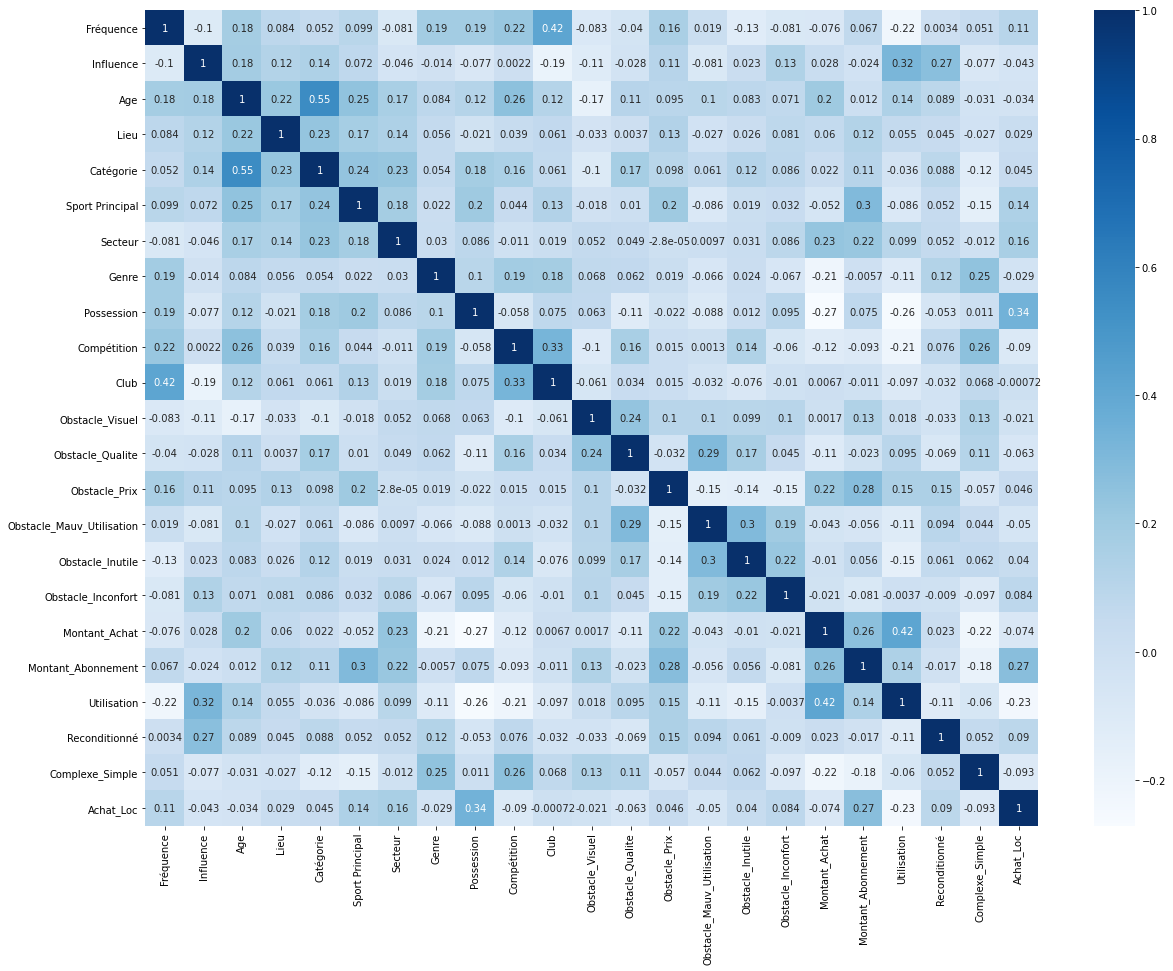

In [55]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,15))   
sns.heatmap(cor, annot=True,ax=ax,cmap='Blues')